# Detecting Hate Speech Using NLP on Twitter Data

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Project Overview

In today’s digital world, social media platforms have become essential arenas for public dialogue, particularly around politics. In Kenya, platforms like Twitter are not only used to share opinions and rally support but are also battlegrounds for targeted hate speech—especially toward political figures.

This project aims to develop a machine learning-based Natural Language Processing (NLP) system to detect hate speech in tweets directed at Kenyan politicians. By analyzing real tweets mentioning individuals such as the President,Deputy President, governors and many others, we seek to understand the patterns of online hate and create a model that classifies content as hate speech or not.

We will leverage standard NLP techniques—such as preprocessing, vectorization (TF-IDF or embeddings), and modeling using algorithms like Logistic Regression, Support Vector Machines, or transformer models like BERT. The project also incorporates exploratory data analysis (EDA) to uncover trends in hateful language, common keywords, and sentiment shifts.

***Imagine a Twitter-like platform where users can post freely. With this model in place, hate speech posts can be automatically flagged or hidden within seconds—drastically improving the experience for users and reducing platform liability.***


Ultimately, this work supports efforts in online safety, content moderation, and digital peacebuilding. The resulting model can assist social media teams, NGOs, and civic tech groups in identifying harmful political discourse in real time.

## Business Understanding
### Problem Statement
Kenyan politicians often face verbal attacks online, particularly during elections, political controversies, or ethnic debates. This hate speech can:

- Incite real-world violence

- Deepen ethnic divisions

- Harm reputations and mental well-being

- Undermine democratic participation

Manual moderation is slow and subjective, and harmful posts can go viral before they are taken down. An automated detection system is therefore critical for early intervention and risk mitigation.

### Project Goals
1. Detect hate speech in tweets directed at Kenyan political figures using supervised machine learning models.
2. Analyze trends in the language and frequency of political hate speech.
3. Provide insights and tools for moderation teams, researchers, and policy makers to take action against online toxicity.

### Key Stakeholders
1. Electoral bodies (IEBC, NCIC)

2. Civil rights NGOs (e.g., Amnesty Kenya, Ushahidi, Uchaguzi)

3. News media and fact-checking organizations

4. Government communication teams

5. Social media platforms (e.g., Twitter Kenya)

6. Academics and digital democracy researchers

### Metrics for Success

#### Model Evaluation Metrics
To evaluate our machine learning model’s effectiveness, we will track:

- Accuracy – How often the model predicts correctly

- Precision (Hate class) – % of flagged hate tweets that were actually hateful

- Recall (Hate class) – % of true hate tweets the model managed to detect

- F1 Score – A balance between precision and recall

- Confusion Matrix – A detailed view of false positives and false negatives

#### Business Impact Metrics
In addition to technical accuracy, we will evaluate the solution based on its real-world impact:

- Moderation efficiency – Reduction in time required for human review

- Detection speed – Time taken to flag hate speech from the moment it's posted

- Coverage fairness – Model performance across tweets targeting different politicians

- Explainability – Ability to justify flagged posts using explainable AI tools like SHAP or LIME


## Project Objectives
1. Build an NLP model to detect hate speech in tweets targeting Kenyan politicians.

2. Analyze linguistic patterns and trends in political hate speech.

3. Compare hate speech dynamics across different politicians.

4. Evaluate model performance using metrics like accuracy, precision, recall, and F1-score.

5. Provide insights to support content moderation and civic monitoring.

6. Establish a foundation for real-time or multilingual hate speech detection systems.

# Data Understanding
The dataset was collected from the Twitter (now X) platform through web scraping techniques, specifically using Tweepy and Twint's TwSearchExporter. The data focuses on tweets that reference prominent and vocal political figures in Kenya, including President William Ruto, Former Deputy President Rigathi Gachagua, Deputy President Kithure Kindiki, among others. The goal was to gather public sentiment and discourse surrounding these figures, particularly in the context of hate speech and offensive language.

The dataset comprises a total of 11,317 records with 6 columns, each representing distinct attributes related to the tweets. These include the tweet content, metadata (such as timestamps), and other contextual information useful for natural language processing tasks.

This dataset serves as the foundation for a hate speech classification project aimed at categorizing tweets into three classes: hate, offensive, and neutral.

The dataset comprises of the columns:

1. **Tweet ID**: A unique identifier assigned to each tweet. Useful for traceability and cross-referencing with Twitter's platform.
2. **Likes**: The number of likes a tweet received, indicating its popularity or approval from users.
3. **Retweets**: The number of times the tweet was retweeted, showing its spread across the platform.
4. **Total Replies**: The number of direct replies the tweet generated, reflecting user engagement and potential controversy.
5. **Texts**: The full textual content of the tweet. This is the primary feature used for natural language processing and classification tasks.
6. **Created At**: The timestamp of when the tweet was published, allowing for temporal analysis or filtering based on time periods.

## Exploring the dataset
Here our aim is to explore the data by asserting the columns and rows distribution, statistical distribution for the columns, and exploring the data types for each column

In [6]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re


import warnings
warnings.filterwarnings('ignore')

In [7]:
#Loading the dataset
data = pd.read_csv('/content/drive/MyDrive/Phase_5/Capstone_project/CAPSTONE-PROJECT/Kenyan_politicians_hatespeech.csv')

data.head()

Tweet ID  Likes  Retweets  Total Replies  \
0  1.912286e+18    2.0       0.0            1.0   
1  1.912285e+18    0.0       0.0            0.0   
2  1.912278e+18    0.0       0.0            0.0   
3  1.912275e+18    0.0       0.0            0.0   
4  1.912272e+18    0.0       0.0            0.0   

                                               Texts  \
0  Rigathi Gachagua ni snitches Ile ya ukweli. La...   
1  @NoCountryHere it’s different for Gachagua man...   
2  @gitaus794 @Mithika_Denno @bonifacemwangi Wher...   
3  @hermexinvesting @MwangiHub The common enemy o...   
4  SHOCK as Gachagua addresses MILLIONS of Mlolon...   

                      Created At  
0  2025-04-15 23:23:00+00:00      
1  2025-04-15 23:21:43+00:00      
2  2025-04-15 22:52:56+00:00      
3  2025-04-15 22:40:45+00:00      
4  2025-04-15 22:30:19+00:00

In [8]:
#Asserting the shape of the dataset
data.shape

(11715, 6)

In [9]:
#Checking column information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11715 entries, 0 to 11714
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tweet ID       11715 non-null  float64
 1   Likes          11715 non-null  float64
 2   Retweets       11715 non-null  float64
 3   Total Replies  11715 non-null  float64
 4   Texts          11715 non-null  object 
 5   Created At     11715 non-null  object 
dtypes: float64(4), object(2)
memory usage: 549.3+ KB


In [10]:
#Checking statistical information for numeric columns
data.describe().T

count          mean           std           min  \
Tweet ID       11715.0  1.829613e+18  1.603489e+17  1.262900e+17   
Likes          11715.0  9.192555e+02  1.424494e+04  0.000000e+00   
Retweets       11715.0  1.970004e+02  2.248039e+03  0.000000e+00   
Total Replies  11715.0  6.852591e+01  1.063107e+03  0.000000e+00   

                        25%           50%           75%           max  
Tweet ID       1.816162e+18  1.894016e+18  1.912250e+18  1.914318e+18  
Likes          1.000000e+00  1.400000e+01  3.090000e+02  1.060202e+06  
Retweets       0.000000e+00  4.000000e+00  5.400000e+01  1.504460e+05  
Total Replies  0.000000e+00  1.000000e+00  2.000000e+01  8.787900e+04

In [11]:
#Checking statistical informatio for categorical columns
data.describe(include = 'O').T

count unique                                                top  \
Texts       11715  11241  We must protect our children from paedophiles,...   
Created At  11715  11228                          2025-04-16 17:06:25+00:00   

           freq  
Texts         7  
Created At    7

In [12]:
#Checking if the data has missing values
data.isnull().sum()

Tweet ID         0
Likes            0
Retweets         0
Total Replies    0
Texts            0
Created At       0
dtype: int64

In [13]:
#Checking for duplicates
data.duplicated().sum()

np.int64(398)

# Data Cleaning

In [14]:
#Saving a new copy to keep contents of the initial dataset
df = data.copy(deep=True)

In [15]:
#Confirm the saved copy
df.head()

Tweet ID  Likes  Retweets  Total Replies  \
0  1.912286e+18    2.0       0.0            1.0   
1  1.912285e+18    0.0       0.0            0.0   
2  1.912278e+18    0.0       0.0            0.0   
3  1.912275e+18    0.0       0.0            0.0   
4  1.912272e+18    0.0       0.0            0.0   

                                               Texts  \
0  Rigathi Gachagua ni snitches Ile ya ukweli. La...   
1  @NoCountryHere it’s different for Gachagua man...   
2  @gitaus794 @Mithika_Denno @bonifacemwangi Wher...   
3  @hermexinvesting @MwangiHub The common enemy o...   
4  SHOCK as Gachagua addresses MILLIONS of Mlolon...   

                      Created At  
0  2025-04-15 23:23:00+00:00      
1  2025-04-15 23:21:43+00:00      
2  2025-04-15 22:52:56+00:00      
3  2025-04-15 22:40:45+00:00      
4  2025-04-15 22:30:19+00:00

In [16]:
# Dropping unwanted column
df = df.drop(columns=['Tweet ID'])

In [17]:
#Confirming the changes
df_columns = df.columns
print(df_columns)

Index(['Likes', 'Retweets', 'Total Replies', 'Texts', 'Created At'], dtype='object')


In [18]:
# Convert to numeric columns to integers
df['Likes'] = pd.to_numeric(df['Likes'], errors='coerce')
df['Retweets'] = pd.to_numeric(df['Retweets'], errors='coerce')
df['Total Replies'] = pd.to_numeric(df['Total Replies'], errors='coerce')

# Convert date column
df['Created At'] = pd.to_datetime(df['Created At'], errors='coerce')

In [19]:
# Clean text column
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www.\S+', '', text)  # remove URLs
    text = re.sub(r'@\w+', '', text)  # remove mentions
    text = re.sub(r'#\w+', '', text)  # remove hashtags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # remove punctuation and numbers
    text = re.sub(r'\s+', ' ', text).strip()  # normalize whitespace
    return text

df['Cleaned_Text'] = df['Texts'].apply(clean_text)

In [20]:
#Confirming cleaned text has been added
df.head()

Likes  Retweets  Total Replies  \
0    2.0       0.0            1.0   
1    0.0       0.0            0.0   
2    0.0       0.0            0.0   
3    0.0       0.0            0.0   
4    0.0       0.0            0.0   

                                               Texts  \
0  Rigathi Gachagua ni snitches Ile ya ukweli. La...   
1  @NoCountryHere it’s different for Gachagua man...   
2  @gitaus794 @Mithika_Denno @bonifacemwangi Wher...   
3  @hermexinvesting @MwangiHub The common enemy o...   
4  SHOCK as Gachagua addresses MILLIONS of Mlolon...   

                 Created At                                       Cleaned_Text  
0 2025-04-15 23:23:00+00:00  rigathi gachagua ni snitches ile ya ukweli laz...  
1 2025-04-15 23:21:43+00:00  its different for gachagua man dont underestim...  
2 2025-04-15 22:52:56+00:00         wheres gachagua with his political leprosy  
3 2025-04-15 22:40:45+00:00  the common enemy outside mt kenya is gachagua ...  
4 2025-04-15 22:30:19+00:00  shock as gachagua addresses millions of mlolon...

In [21]:
 #Insert the new column(Label) after 'cleaned_text'
col_index = df.columns.get_loc('Cleaned_Text') + 1  # position after 'cleaned_text'
df.insert(loc=col_index, column='Label', value= '')  # or value='pending' or ''

In [22]:
# Convert to categorical columns
df['Cleaned_Text'] = df['Cleaned_Text'].astype('category')
df['Label'] = df['Label'].astype('category')

In [23]:
 #Convert to categorical columns
df['Cleaned_Text'] = df['Cleaned_Text'].astype('category')
df['Label'] = df['Label'].astype('category')

In [24]:
# Cleaning column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [25]:
#Dropping the original text column
df = df.drop(columns=['texts'])
df.columns

Index(['likes', 'retweets', 'total_replies', 'created_at', 'cleaned_text',
       'label'],
      dtype='object')

In [26]:
#Saving the cleaned text for labeling
df.to_csv('kenyan_politics_cleaned_text.csv', index=False)

## Labeling of the texts

#### Labeling Strategy

Given the linguistic characteristics of our dataset, we opted for a manual labeling approach. A significant portion of the tweets are written in Sheng, a hybrid sociolect that blends English and Swahili, and is widely spoken in urban areas of Kenya. Sheng is highly dynamic, context-dependent, and culturally nuanced—posing unique challenges for automated natural language processing tools, especially pre-trained models which lack exposure to this evolving vernacular.

At present, there are no existing models or datasets that can effectively interpret and label Sheng text with high accuracy. Most multilingual language models fail to grasp the contextual depth, code-switching patterns, and slang prevalent in this language. As native speakers and individuals well-acquainted with the social and political landscape of Kenya, we leveraged our linguistic and cultural understanding to perform manual annotation of the tweets.

Each tweet was carefully reviewed and labeled into one of three categories:

1. Hate – content expressing hateful, discriminatory, or inciting language.

2. Offensive – content containing insults, vulgar language, or disrespectful tone, but not necessarily hateful.

3. Neutral – content that is informative, benign, it is neither hateful nor offensive.

This manual process ensures high-quality annotations that are contextually accurate and culturally relevant, forming a reliable foundation for training an effective hate speech classification model.

Our approach was to save the cleaned dataset inform of csv and label  manually from Excel.

In [27]:
#Loading the labeled dataset
df1 = pd.read_csv('/content/drive/MyDrive/Phase_5/Capstone_project/CAPSTONE-PROJECT/labeled_kenyan_hatespeech.csv')

We can further explore the labeled data for any abnormalities

In [28]:
df1.head()

Unnamed: 0  likes  retweets  total_replies                 created_at  \
0           0     39         2              0  2024-07-30 10:27:22+00:00   
1           1      0         0              0  2024-07-31 07:12:21+00:00   
2           2      5         5              0  2024-07-20 10:43:30+00:00   
3           3    593       248            114  2024-07-12 18:31:05+00:00   
4           4      6         4              0  2024-09-29 21:45:26+00:00   

                                        cleaned_text    label  
0  former ig japheth koome should be taken to icc...  neutral  
1  my views japheth koome should be charged prose...  neutral  
2  at this rate we might as well have ig japheth ...  neutral  
3  kenyas police chief japhet koome has resigned ...  neutral  
4  japheth koomes resignation has resulted in the...  neutral

In [29]:
df1.shape

(9701, 7)

In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9701 entries, 0 to 9700
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     9701 non-null   int64 
 1   likes          9701 non-null   int64 
 2   retweets       9701 non-null   int64 
 3   total_replies  9701 non-null   int64 
 4   created_at     9701 non-null   object
 5   cleaned_text   9701 non-null   object
 6   label          9701 non-null   object
dtypes: int64(4), object(3)
memory usage: 530.7+ KB


In [31]:
#Checking the null values
df1.isnull().sum()

Unnamed: 0       0
likes            0
retweets         0
total_replies    0
created_at       0
cleaned_text     0
label            0
dtype: int64

In [32]:
#Checking the duplicates
df1.duplicated().sum()

np.int64(0)

In [33]:
#Dropping the unnamed column
df1.drop(columns=['Unnamed: 0'],inplace=True,axis=1)

In [34]:
#Dropping the null values
df1.dropna(subset=['cleaned_text'], inplace=True)


In [35]:
#Dropping the duplicates
df1.drop_duplicates(inplace=True)

In [36]:
#Confirming changes
df1.isnull().sum().any()

np.False_

In [37]:
#Confirming elimination of all the duplicates
df1.duplicated().sum()

np.int64(0)

In [38]:
# Apply .lower() to every string cell in the DataFrame
df1 = df1.applymap(lambda x: x.lower() if isinstance(x, str) else x)

In [39]:
#Confirming the changes
df1['label'].value_counts()

label
neutral      5838
hate         1954
offensive    1909
Name: count, dtype: int64

In [40]:
#Loading the final shape of the dataset
df1.shape

(9701, 6)

# Feature Engineering
Feature engineering is a critical step in preparing the dataset for analysis and modeling. It involves creating new features that better represent the underlying patterns in the data. Below are the engineered features and the reasoning behind their inclusion:

### Columns Used for Feature Engineering

- **likes**, **retweets**, **total_replies**
  - These three metrics reflect user engagement with a tweet. Individually, they are important, but combined, they can offer a more comprehensive view.

- **cleaned_text**
  - The cleaned tweet content is used to extract linguistic features like length, word count, hashtags, and mentions, which help understand the structure and purpose of a tweet.

- **created_at**
  - This datetime field is used to derive time-based patterns, such as when a politician is trending or how tweet activity varies by season, hour, or weekday.

---

### New Features Created

- **engagement_score** = likes + retweets + total_replies  
  → A unified metric to measure tweet popularity or user response.

- **tweet_length**  
  → Total number of characters in a tweet. Longer tweets may carry more detail or stronger sentiment.

- **word_count**  
  → Number of words in a tweet. Helps analyze verbosity or messaging style.

- **hour**, **day**, **month**, **year**, **day_of_week**, **season**


→ Helps analyze temporal trends in tweet activity and engagement, including political events or public sentiment surges.


---

These engineered features help improve the interpretability of the dataset and enhance the performance.


In [41]:
!pip install spacy
!pip install rapidfuzz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 37.7 MB/s eta 0:00:00


In [42]:
#Loading the required libraries
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

import calendar
from dateutil import easter
import spacy
from rapidfuzz import process, fuzz
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


In [43]:
df1.sample(50)

likes  retweets  total_replies                     created_at  \
5800      0         0              0      2024-07-04 13:50:45+00:00   
5684    104        15             15      2025-04-05 16:32:38+00:00   
2783      0         0              0     2025-04-12 14:54:08+00:00    
314      18         0              0      2025-04-12 05:02:15+00:00   
1588      0         0              1      2025-03-21 20:40:19+00:00   
5500    146        40              3      2025-04-11 10:14:03+00:00   
8308      3         1              1      2025-04-14 11:44:35+00:00   
7543      0         0              0      2024-12-22 22:07:14+00:00   
1524      4         0              0      2025-04-03 10:37:45+00:00   
5246    230        22             17      2024-05-23 14:33:48+00:00   
2890      0         0              0     2025-04-15 15:45:46+00:00    
2870      0         0              0     2025-04-15 15:49:35+00:00    
4054   2578       957            202      2024-12-03 12:32:24+00:00   
2449      0         0              0   2025-04-16 08:48:59+00:00      
2276      0         0              0  2025-04-15 20:31:37+00:00       
4818    265        38             73      2024-05-17 12:03:19+00:00   
3857      5         3              0      2025-04-21 16:59:14+00:00   
2979      0         0              0     2025-04-15 15:25:41+00:00    
6422    147        66              3      2024-07-30 13:21:49+00:00   
366      14         1              0      2022-08-03 16:07:38+00:00   
6052   6858      2496            217      2024-06-12 18:09:47+00:00   
784       7         1              2      2025-04-16 16:02:54+00:00   
9628   2600       345            376      2021-03-06 17:54:11+00:00   
5748    152        18             37      2025-04-10 11:57:31+00:00   
5945      7         0              1      2025-04-20 14:17:26+00:00   
8105      1        10              0      2025-04-16 14:33:19+00:00   
6992      1         1              0      2025-04-21 14:10:56+00:00   
6035    581        49             16      2024-04-23 20:27:58+00:00   
9338   1941       282           1198      2024-06-29 10:23:06+00:00   
9040     11         1              0      2024-07-30 09:24:03+00:00   
5776    269        51             11      2024-06-16 20:16:57+00:00   
9400   1712       354            291      2025-04-10 09:44:44+00:00   
8556      8         2              0      2025-01-24 18:18:20+00:00   
2899      0         0              0     2025-04-15 15:44:13+00:00    
3658   3807       902             53      2025-04-17 13:48:01+00:00   
8048      0         0              0      2025-04-10 11:19:54+00:00   
229     978       172            131      2025-04-12 14:40:09+00:00   
9154      1         1              1      2025-04-21 12:47:58+00:00   
2585      0         0              0    2025-04-15 14:35:12+00:00     
1043    115        27              7      2025-02-23 20:14:40+00:00   
632       1         0              1      2025-04-20 19:50:08+00:00   
9495      0         0              0      2025-04-17 06:52:43+00:00   
4336      0         0              0      2024-07-30 11:39:53+00:00   
5918    212        62             75      2025-04-21 13:03:12+00:00   
719       0         0              0      2025-04-17 20:39:56+00:00   
5362      1         0              0      2024-12-24 23:13:55+00:00   
4066    133        13              1      2025-04-12 16:52:37+00:00   
2814      0         0              0     2025-04-10 08:28:19+00:00    
4003    486        33            143      2025-04-01 16:20:48+00:00   
4503     92        26              3      2024-07-12 11:49:01+00:00   

                                           cleaned_text      label  
5800  huyu jamaa nikama anakwanga bedroom moja na ru...  offensive  
5684  happy th birthday bishop dr phylis hinga and c...    neutral  
2783  where do you get this strength of talking agai...    neutral  
314   yg ngatain ak gendut itu jgn percaya buktinyaa...  offensive  
1588  oped mandagos proposal a bold ste

### 1. Engagement Score (likes, retweets, and replies)

In [44]:
# Calculate combined engagement
df1['engagement_score'] = df1['likes'] + df1['retweets'] + df1['total_replies']

### 2. Tweet Length (number of characters)

In [45]:
df1['text_length'] = df1['cleaned_text'].apply(len)
df1['text_length'].head(5)

0     74
1    120
2    104
3    246
4    273
Name: text_length, dtype: int64

### 3. Engagement bins for likes, retweets, replies and the total engagement

In [46]:
# Binning individual engagement types
df1['likes_bin'] = pd.cut(df1['likes'], bins=[-1, 0, 10, 100, 1000, 10000,100000], labels=['0', '1-10', '11-100', '101-1k', '1001-10k','10k+'])
df1['retweets_bin'] = pd.cut(df1['retweets'], bins=[-1, 0, 10, 100, 1000, 10000, 100000], labels=['0', '1-10', '11-100', '101-1k', '1001-10k','10k+'])
df1['replies_bin'] = pd.cut(df1['total_replies'], bins=[-1, 0, 10, 100, 1000, 10000, 100000], labels=['0', '1-10', '11-100', '101-1k', '1001-10k','10k+'])
df1['engagement_bin'] = pd.cut(df1['engagement_score'], bins=[-1, 0, 10, 100, 1000, 10000, 100000], labels=['0', '1-10', '11-100', '101-1k', '1001-10k', '10k+'])

### 4. Add a wordcount and text length column

In [47]:
 #Add word count column
df1['word_count'] = df1['cleaned_text'].apply(lambda x: len(str(x).split()))



### 5. Extract Named Entities of Type PERSON (e.g., politicians)

In [48]:
# Load spacy's small model
nlp = spacy.load('en_core_web_sm')

def extract_entities(text):
    doc = nlp(text)
    # Extract entities of type 'PERSON' and return as a comma-separated string
    entities = [ent.text for ent in doc.ents if ent.label_ == 'PERSON']
    return ', '.join(entities)  # Join the list into a single string

# Apply the function to your DataFrame
df1['entities'] = df1['cleaned_text'].apply(extract_entities)

### 6. Extract Time Features

In [49]:
# Extract parts of the datetime
# Convert the column to datetime
df1['created_at'] = pd.to_datetime(df1['created_at'], errors='coerce')
df1['year'] = df1['created_at'].dt.year
df1['month'] = df1['created_at'].dt.month
df1['day'] = df1['created_at'].dt.day
df1['day_of_week'] = df1['created_at'].dt.day_name()
df1['hour'] = df1['created_at'].dt.hour

#### 6.1. Define Fixed Holidays

In [50]:
def add_named_holidays(df1):
    fixed_holidays = {
        '01-01': "New Year's Day",
        '05-01': "Labour Day",
        '06-01': "Madaraka Day",
        '10-20': "Mashujaa Day",
        '12-12': "Jamhuri Day",
        '12-25': "Christmas Day",
        '12-26': "Boxing Day"
    }

    eid_dates = {
        2020: {'Eid al-Fitr': '05-23', 'Eid al-Adha': '07-31'},
        2021: {'Eid al-Fitr': '05-13', 'Eid al-Adha': '07-19'},
        2022: {'Eid al-Fitr': '05-02', 'Eid al-Adha': '07-08'},
        2023: {'Eid al-Fitr': '04-21', 'Eid al-Adha': '06-29'},
        2024: {'Eid al-Fitr': '04-10', 'Eid al-Adha': '06-16'},
        2025: {'Eid al-Fitr': '03-31', 'Eid al-Adha': '06-07'},
    }

    df1['holiday_name'] = None

    for idx, row in df1.iterrows():
        if pd.isna(row['year']) or pd.isna(row['created_at']):
            continue  # Skip rows without date/year

        month_day = row['created_at'].strftime('%m-%d')
        year = int(row['year'])

        # Fixed holidays
        if month_day in fixed_holidays:
            df1.at[idx, 'holiday_name'] = fixed_holidays[month_day]

        # Easter-based holidays
        try:
            easter_day = easter.easter(year)
            if month_day == (easter_day - pd.Timedelta(days=2)).strftime('%m-%d'):
                df1.at[idx, 'holiday_name'] = "Good Friday"
            elif month_day == (easter_day + pd.Timedelta(days=1)).strftime('%m-%d'):
                df1.at[idx, 'holiday_name'] = "Easter Monday"
        except Exception as e:
            pass

        # Eid holidays
        if year in eid_dates:
            for name, eid_md in eid_dates[year].items():
                if month_day == eid_md:
                    df1.at[idx, 'holiday_name'] = name

    return df1

In [51]:
df1 = add_named_holidays(df1)
df1['holiday_name'].value_counts()

holiday_name
Easter Monday     450
Good Friday       268
Christmas Day      63
Boxing Day         60
Eid al-Fitr        23
Mashujaa Day        9
Labour Day          9
Madaraka Day        8
Jamhuri Day         7
New Year's Day      6
Eid al-Adha         6
Name: count, dtype: int64

In [52]:
# Prepare and clean entity strings
entities_series = df1['entities'].fillna('').astype(str).str.lower().str.split(',')
all_entities = [name.strip() for sublist in entities_series for name in sublist if name.strip()]

# Build a frequency counter to prioritize common names
from collections import Counter
entity_counts = Counter(all_entities)

# Get unique names
unique_entities = list(entity_counts.keys())

# Map similar names to a representative (canonical) name
canonical_map = {}
used = set()

for name in unique_entities:
    if name in used:
        continue
    matches = process.extract(
        name, unique_entities, scorer=fuzz.token_sort_ratio, limit=None
    )
    # Group names with similarity > 90
    similar_names = [match for match, score, _ in matches if score > 90]
    for sim in similar_names:
        canonical_map[sim] = name
        used.add(sim)

# Apply mapping to original DataFrame
def standardize_entities(entity_str):
    if pd.isna(entity_str) or not entity_str.strip():
        return ''
    names = [name.strip().lower() for name in entity_str.split(',')]
    std_names = [canonical_map.get(name, name) for name in names]
    return ', '.join(sorted(set(std_names)))  # deduplicate within tweet

df1['entities_standardized'] = df1['entities'].apply(standardize_entities)

### 5. Outlier detection

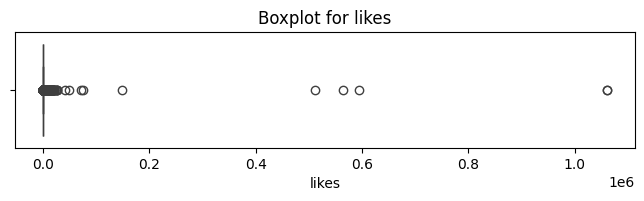

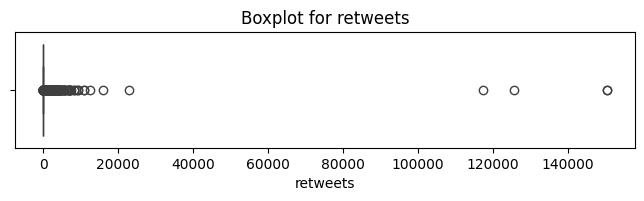

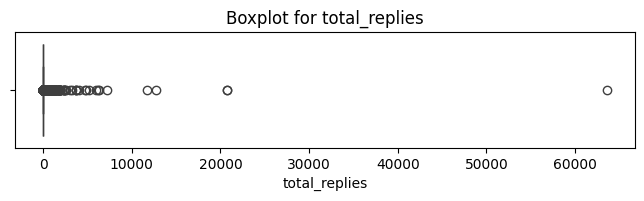

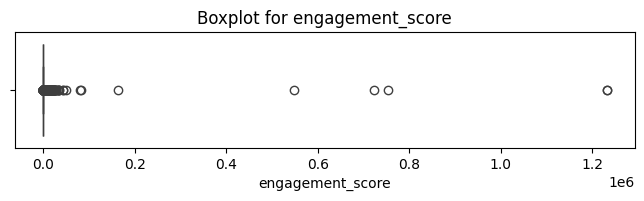

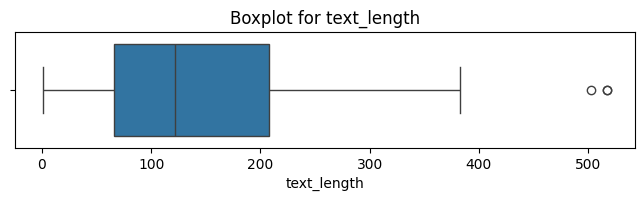

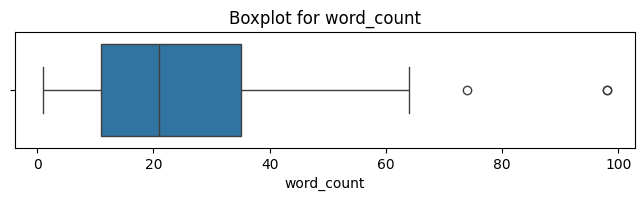

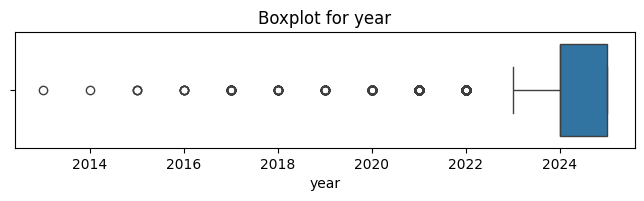

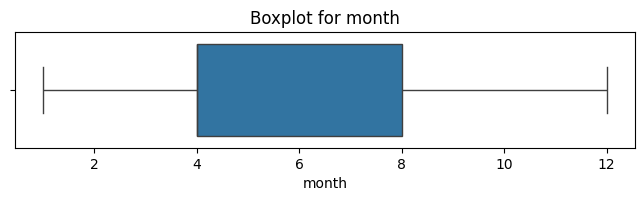

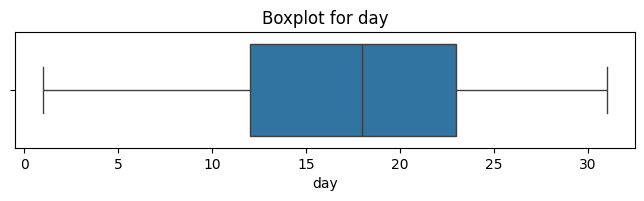

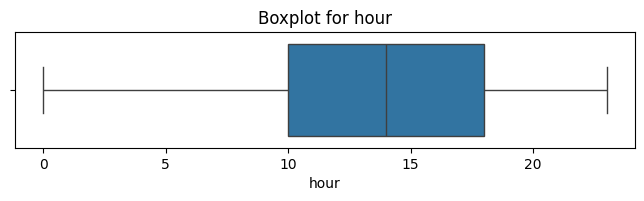

In [53]:
# Select only numeric columns
numeric_cols = ['likes', 'retweets', 'total_replies', 'engagement_score',
                'text_length', 'word_count', 'year', 'month', 'day', 'hour']

for col in numeric_cols:
    plt.figure(figsize=(8, 1.5))
    sns.boxplot(x=df1[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

In [54]:
df1.head()

likes  retweets  total_replies                created_at  \
0     39         2              0 2024-07-30 10:27:22+00:00   
1      0         0              0 2024-07-31 07:12:21+00:00   
2      5         5              0 2024-07-20 10:43:30+00:00   
3    593       248            114 2024-07-12 18:31:05+00:00   
4      6         4              0 2024-09-29 21:45:26+00:00   

                                        cleaned_text    label  \
0  former ig japheth koome should be taken to icc...  neutral   
1  my views japheth koome should be charged prose...  neutral   
2  at this rate we might as well have ig japheth ...  neutral   
3  kenyas police chief japhet koome has resigned ...  neutral   
4  japheth koomes resignation has resulted in the...  neutral   

   engagement_score  text_length likes_bin retweets_bin  ... engagement_bin  \
0                41           74    11-100         1-10  ...         11-100   
1                 0          120         0            0  ...              0   
2                10          104      1-10         1-10  ...           1-10   
3               955          246    101-1k       101-1k  ...         101-1k   
4                10          273      1-10         1-10  ...           1-10   

  word_count               entities    year  month   day  day_of_week  hour  \
0         13          japheth koome  2024.0    7.0  30.0      Tuesday  10.0   
1         18  japheth koome, maduro  2024.0    7.0  31.0    Wednesday   7.0   
2         19                         2024.0    7.0  20.0     Saturday  10.0   
3         37           japhet koome  2024.0    7.0  12.0       Friday  18.0   
4         43         japheth koomes  2024.0    9.0  29.0       Sunday  21.0   

   holiday_name  entities_standardized  
0          None          japheth koome  
1          None  japheth koome, maduro  
2          None                         
3          None          japheth koome  
4          None          japheth koome  

[5 rows x 21 columns]

# Exploratory Data Analysis (EDA)

## Univariate Analysis

### Univariate Analysis For Numeric Data

#### Social Media Metrics Distribution

In [55]:
#Box plot
fig = px.box(df1, y=['likes', 'retweets', 'total_replies'],
             title="Distribution of Social Media Metrics")
fig.show()

**Observations**

- Likes Dominate: It's immediately clear that the number of likes tends to be significantly higher than both retweets and total replies. The box plot for 'likes' is positioned much higher on the value scale.

- Low Engagement for Replies: The 'total_replies' metric shows the lowest values overall. The box plot is clustered very close to zero, suggesting that the posts in this dataset generally receive a very small number of direct replies.

- Retweets in the Middle: The distribution of 'retweets' falls somewhere in between likes and total replies. While not as high as likes, there are noticeably more retweets than direct replies.


#### Text length distribution

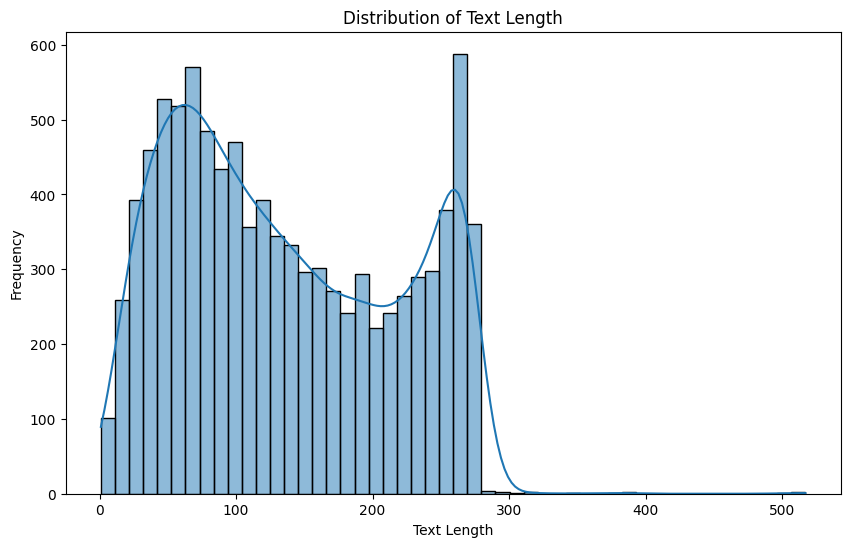

In [56]:
# Overall text length distribution
plt.figure(figsize=(10, 6))
sns.histplot(df1['text_length'], bins=50, kde=True)
plt.title('Distribution of Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()


**Observations**

The distribution of text length is right-skewed, with the highest concentration of texts between 10 and 15 words, and additional smaller peaks around 25 and 40 words, indicating the presence of multiple text types.

#### Distribution of Engagement Score

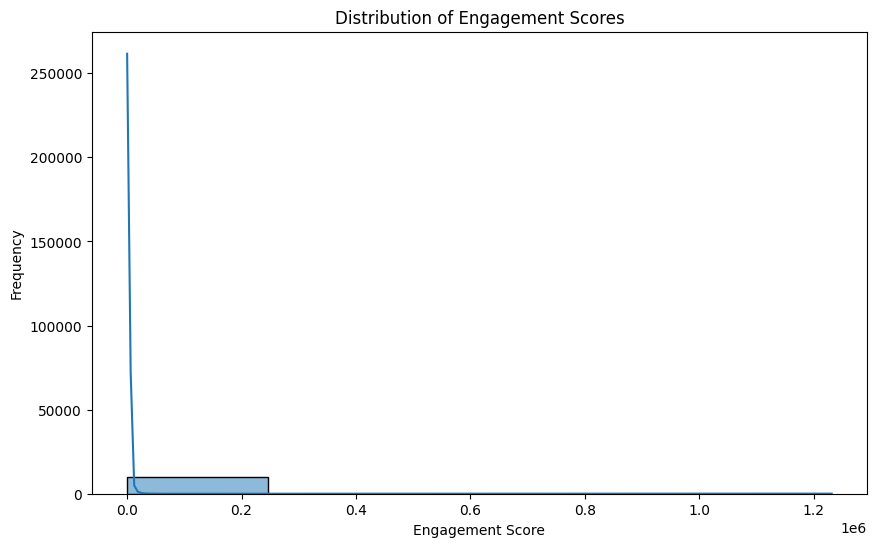

In [57]:
# Engagement score distribution
plt.figure(figsize=(10, 6))
sns.histplot(df1['engagement_score'], bins=5, kde=True)
plt.title('Distribution of Engagement Scores')
plt.xlabel('Engagement Score')
plt.ylabel('Frequency')
plt.show()


**Observations**

- Highly Skewed Distribution: The distribution is heavily skewed to the right. Most of the engagement scores are concentrated at the lower end of the scale (below 0.25 million), with a long tail extending towards much higher values.

- Low Frequency of High Engagement: The curve indicates that very high engagement scores are quite rare. The frequency drops off dramatically as the engagement score increases.



#### Distribution of Sentiment Score

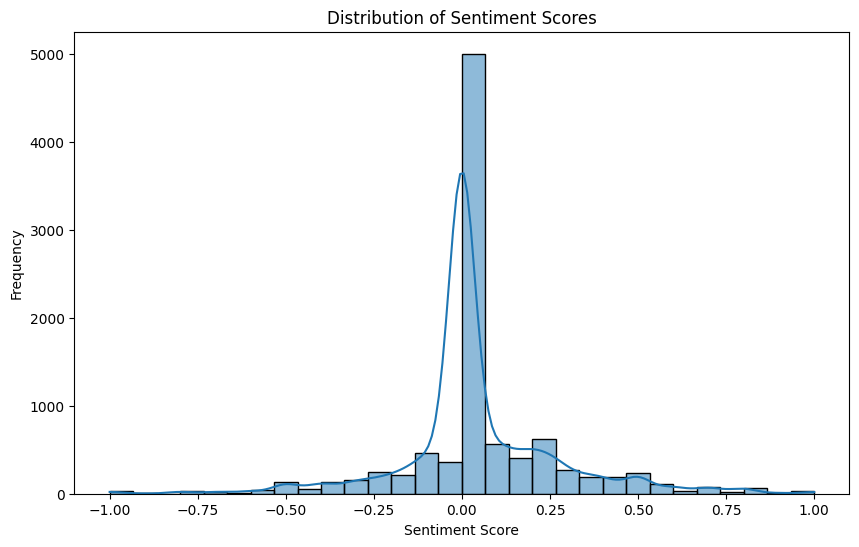

In [58]:
from textblob import TextBlob

# Function to get sentiment score
def get_sentiment(text):
  analysis = TextBlob(text)
  return analysis.sentiment.polarity

# Apply the function to your text data
df1['sentiment_score'] = df1['cleaned_text'].apply(get_sentiment)

# Sentiment classification
def classify_sentiment(score):
  if score > 0:
    return 'Positive'
  elif score < 0:
    return 'Negative'
  else:
    return 'Neutral'

df1['sentiment_label'] = df1['sentiment_score'].apply(classify_sentiment)

# Ploting Sentiment Scores
plt.figure(figsize=(10, 6))
sns.histplot(df1['sentiment_score'], bins=30, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

**Observations**
- The sentiment scores are symmetrically distributed around 0, indicating a balance between positive and negative sentiments.
- Most scores cluster near zero, suggesting neutral or mildly positive/negative sentiments dominate, while extreme scores (close to -1 or 1) are less frequent.
- The distribution peaks at 0.00, highlighting a prevalence of neutral sentiment.


### Univariate Analysis For Categorical Data

#### Distribution of Labels

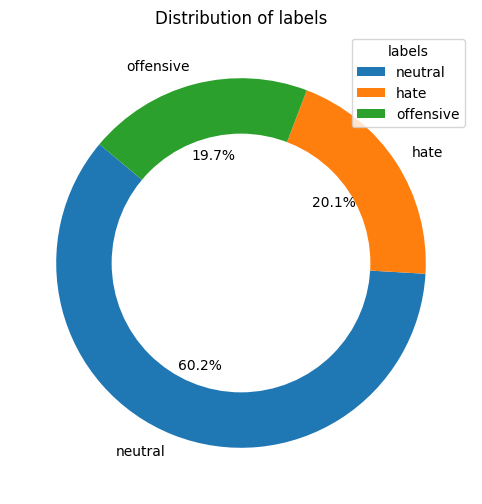

In [59]:
# count of the labels
label_count = df1['label'].value_counts()

# create a piplot to show thw distribution
plt.figure(figsize=(8,6))
plt.pie(label_count, labels=label_count.index, autopct='%1.1f%%', startangle=140)

# create a blank circle at the centre
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# customize the plot
plt.title("Distribution of labels")
plt.legend(title="labels", loc="upper right")
plt.show()

**Observations**

- The  chart visually depicts a significant class imbalance in the dataset.

- The "neutral" class has the highest percentage of 60.2%, followed by "hate"20.1% and then "offensive"19.7% .

#### Word Count/ Frequency Analysis

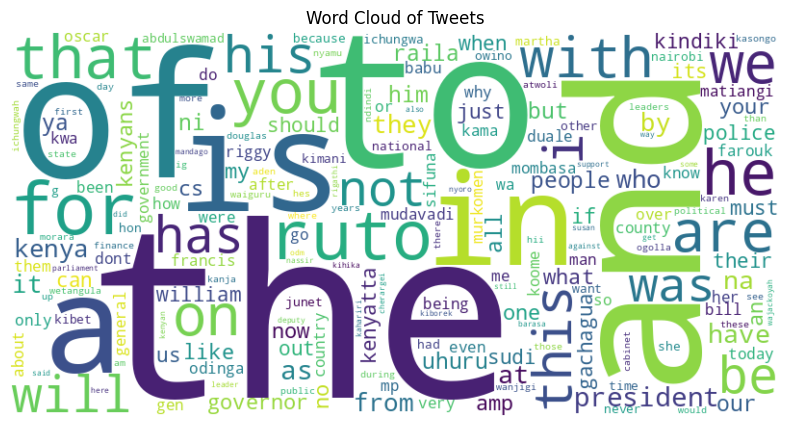

In [60]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Tokenizing the text and count word frequencies
word_counts = Counter(" ".join(df['cleaned_text']).split())

# Generating the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# Plotting word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Tweets")
plt.show()

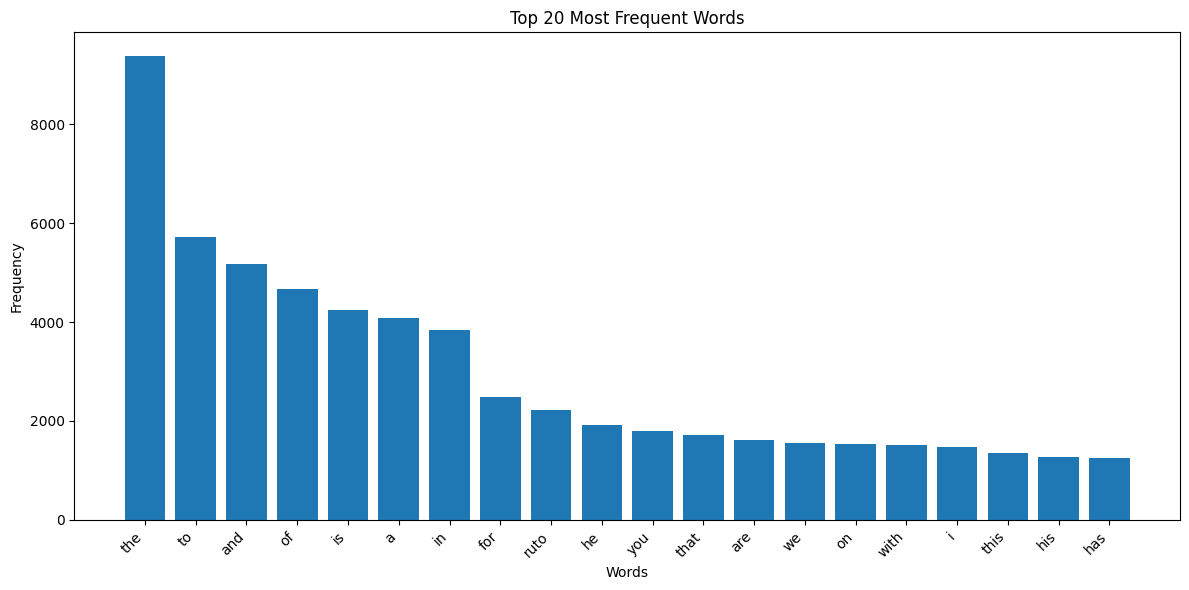

In [61]:
# Bar Chart of Top Frequent Words
top_n = 20
top_words = word_counts.most_common(top_n)  # Get top N frequent words

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.bar(range(len(top_words)), [val[1] for val in top_words], align='center')  # Plot frequencies
plt.xticks(range(len(top_words)), [val[0] for val in top_words], rotation=45, ha='right')  # Set word labels
plt.title(f"Top {top_n} Most Frequent Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

**Observation**

- The bar chart displays the top 20 most frequent words in the dataset, with "the" appearing as the most common word by a significant margin, occurring over 8,000 times.
- This is followed by other high-frequency words like "to," "and," "is," "of," and "a," all of which are common English stop words.
- The frequencies gradually decrease across the chart, with the 20th word, "be," occurring just over 1,000 times.

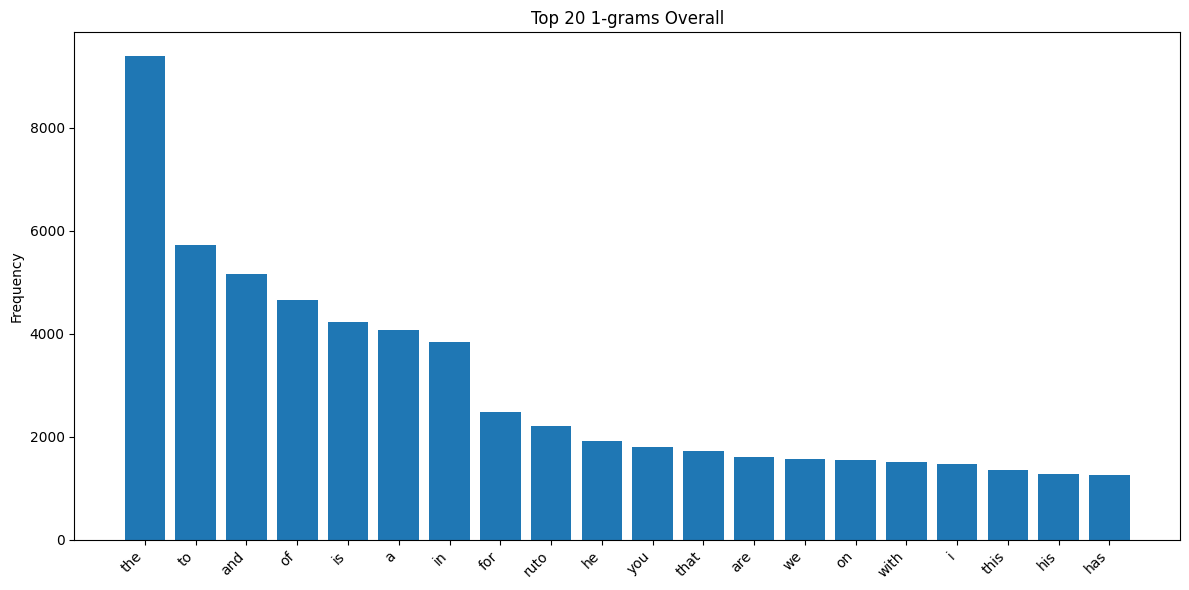

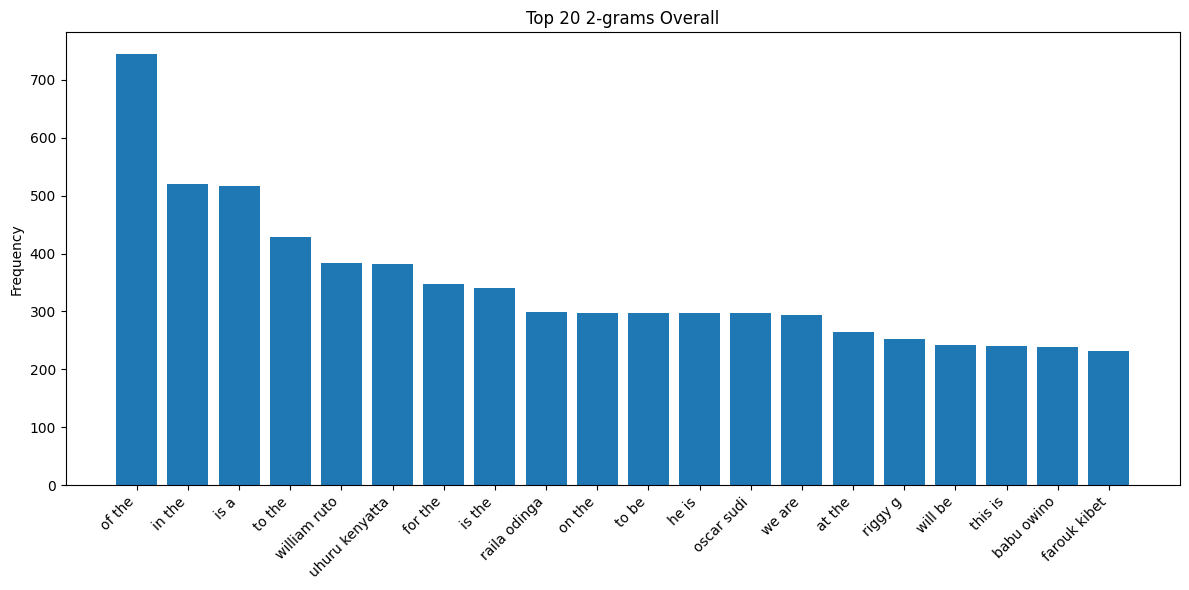

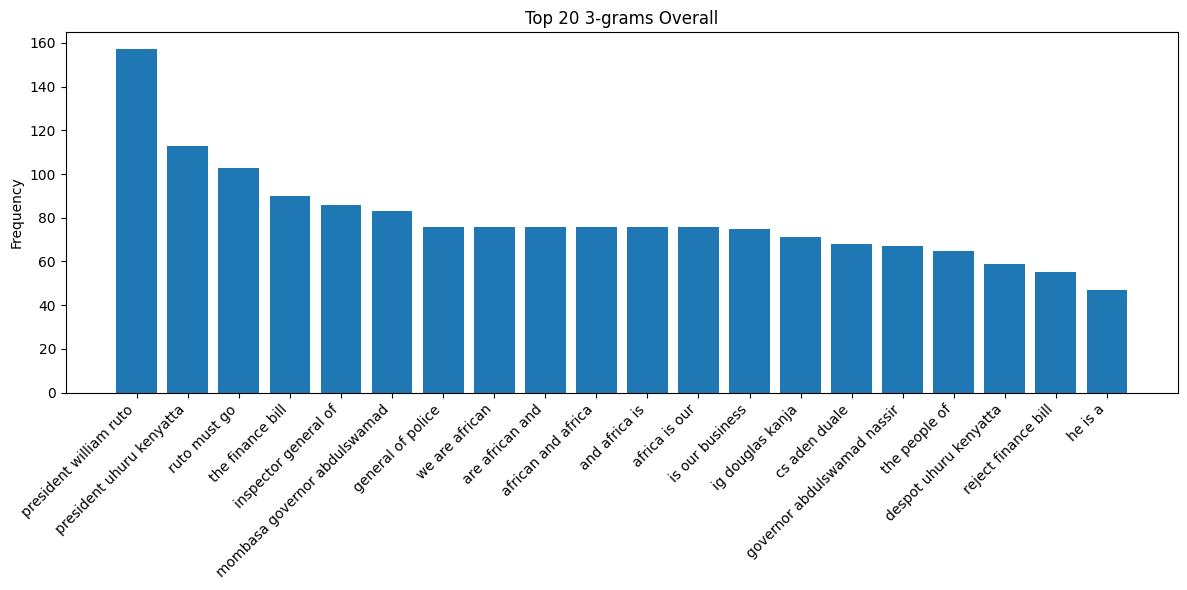

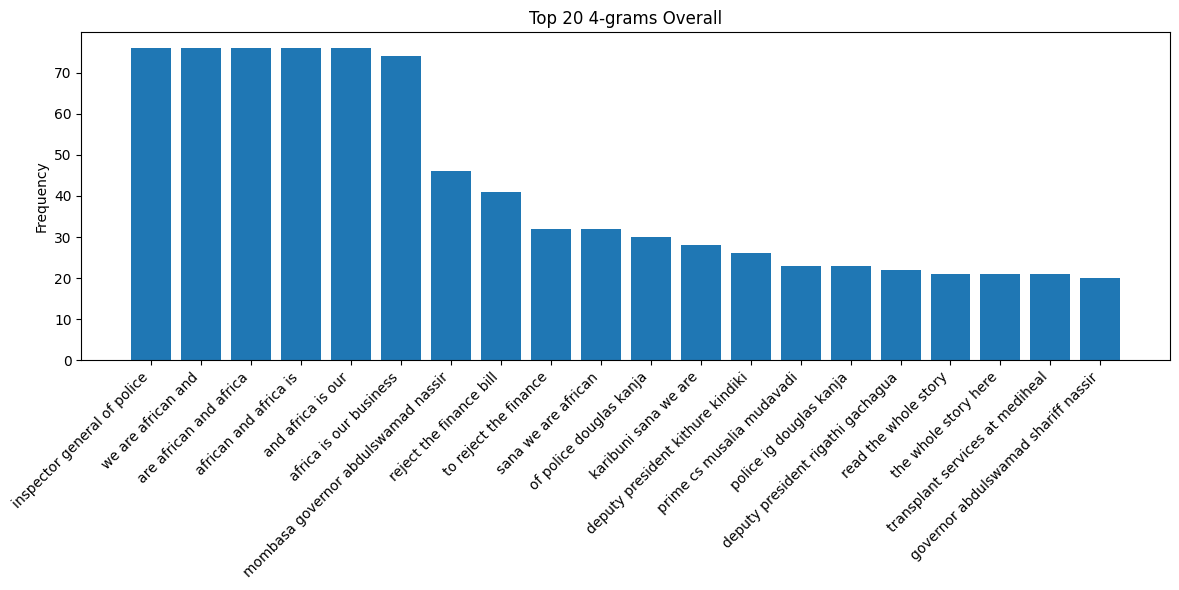

In [62]:
from nltk import ngrams

# Function to get top n-grams
def get_top_ngrams(text_series, n=1, top_k=10):
    counter = Counter()
    for text in text_series:
        tokens = text.split()
        counter.update(ngrams(tokens, n))
    return counter.most_common(top_k)

N = 20  # Defining the desired number of top N-grams

# Univariate analysis for N-grams
ngram_orders = [1, 2, 3, 4]  # Analyze 1-grams, 2-grams, and 3-grams

for n in ngram_orders:
    top_ngrams_overall = get_top_ngrams(df['cleaned_text'], n=n, top_k=N)
    grams = [' '.join(g) for g, _ in top_ngrams_overall]
    counts = [cnt for _, cnt in top_ngrams_overall]

    plt.figure(figsize=(12, 6))
    plt.bar(grams, counts)
    plt.title(f"Top {N} {n}-grams Overall")
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

**Observations**

1. **Top 1-grams:**

- Common function words dominate: Words like "the," "to," "and," "is," "of," "a" are the most frequent indicating general grammatical structure.

- Mentions of names: "ruto" and "he" appear prominently, suggesting frequent reference to a person, likely a key subject in the dataset.

- Contextual words like "for," "you," "that," "are," "with," "this," "will" hint at a mix of descriptive, directive, and future-looking content.

2. **Top 2-grams:**

- High frequency of functional phrase pairings: e.g., "of the," "in the," "is a," "to the," "is the."

- Named entities & individuals appear: e.g., "william ruto," "riggy g," "raila odinga," "oscar sudi," "karen nyamu." This implies strong political or public discourse themes.

- Political relevance: Many bigrams relate to government or political figures.

3. **Top 3-grams:**

- Dominance of political terms: e.g., "president william ruto," "ruto must go," "reject finance bill."

- Clear protest phrases: Suggests the dataset may include social or political criticism or rallying messages.

Thematic clusters:

- Politics/Governance: "cs aden duale," "the people of," "finance bill."

- Identity & Culture: "we are african," "african and africa," "africa is our."

4. **Top 4-grams**

- Activist/protest language is even clearer: e.g., "reject the finance bill," "to reject the finance," "incompetent amp corrupt."

- Recurring focus on African identity: Multiple phrases like "we are african and," "africa is our business."

- Mentions of government institutions and figures: e.g., "inspector general of police," "deputy president kithure kindiki," "first lady rachel ruto."

#### Character Frequency Analysis

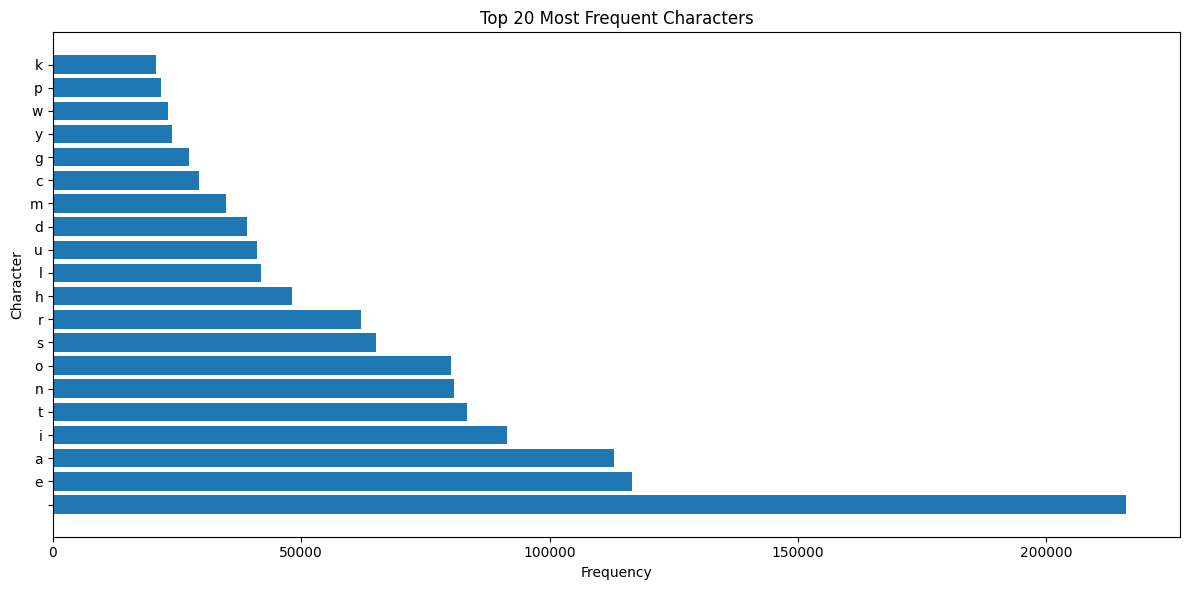

In [63]:
# Combine all text into a single string
all_text = ''.join(df1['cleaned_text'].astype(str).tolist())

# Calculate character frequencies
char_counts = Counter(all_text)

# Create a DataFrame for easier handling
char_freq_df = pd.DataFrame.from_dict(char_counts, orient='index', columns=['frequency']).sort_values('frequency', ascending=False)

# Plot the top N most frequent characters
plt.figure(figsize=(12, 6))
plt.barh(char_freq_df.index[:top_n], char_freq_df['frequency'][:top_n])
plt.title(f'Top {top_n} Most Frequent Characters')
plt.ylabel('Character')
plt.xlabel('Frequency')
plt.tight_layout()
plt.show()

**Observation**

- The bar chart displays the top 20 most frequent characters, showing that vowels dominate the distribution, with 'e' being the most common character by a large margin, followed by 'a', 'i', and 't'.
- This pattern aligns with general English language usage, where vowels and certain consonants like 'n', 's', and 'r' appear frequently.
- Less frequent characters like 'k', 'p', and 'w' occur significantly less often, suggesting they play a more limited role in the overall text content.

### Word distribution and Frequency of labels

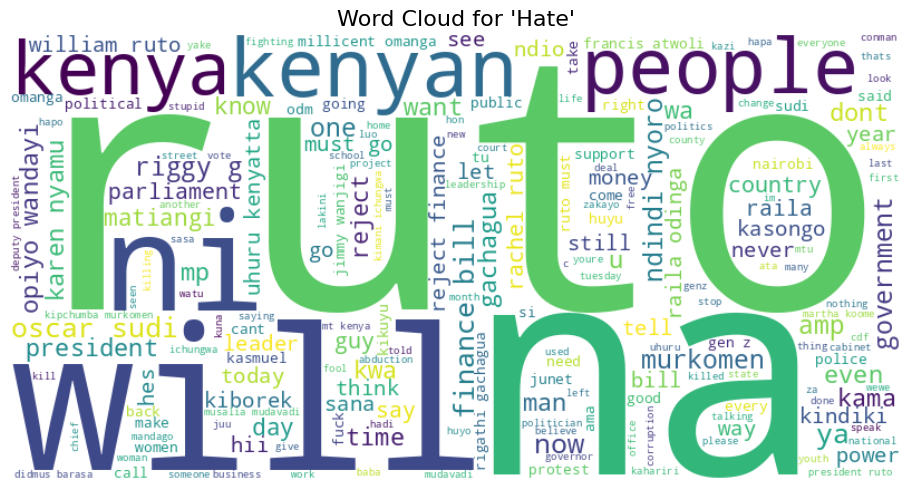

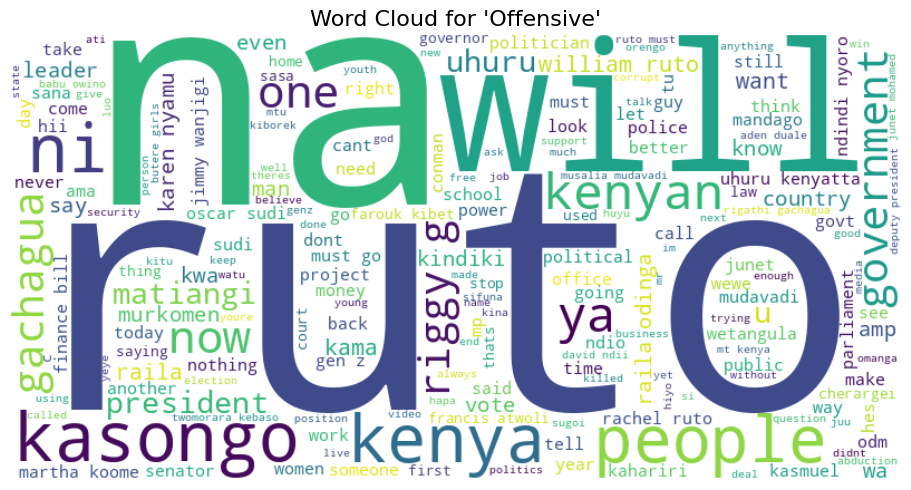

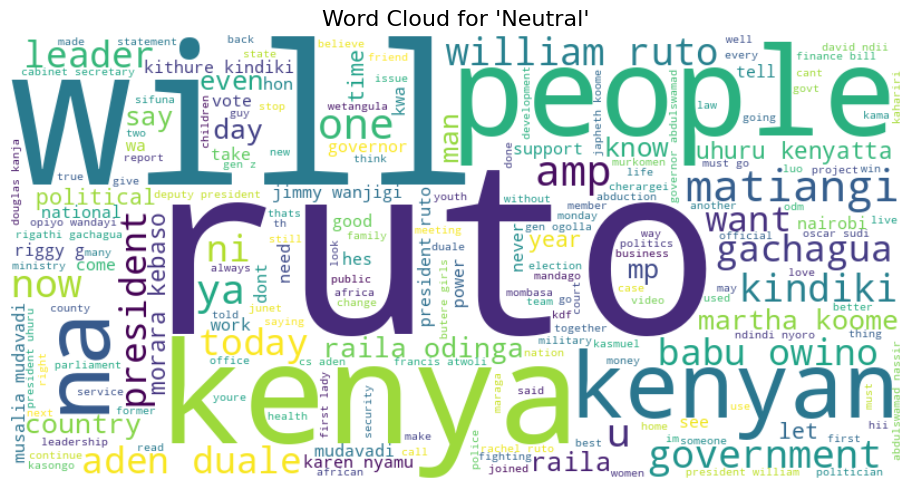

In [64]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate and display a word cloud
def generate_wordcloud(df, label_value):
    texts = df1[df1['label'] == label_value]['cleaned_text']
    all_text = " ".join(texts)

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for '{label_value.capitalize()}'", fontsize=16)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Generate word cloud for each label
for category in ['hate', 'offensive', 'neutral']:
    generate_wordcloud(data, category)


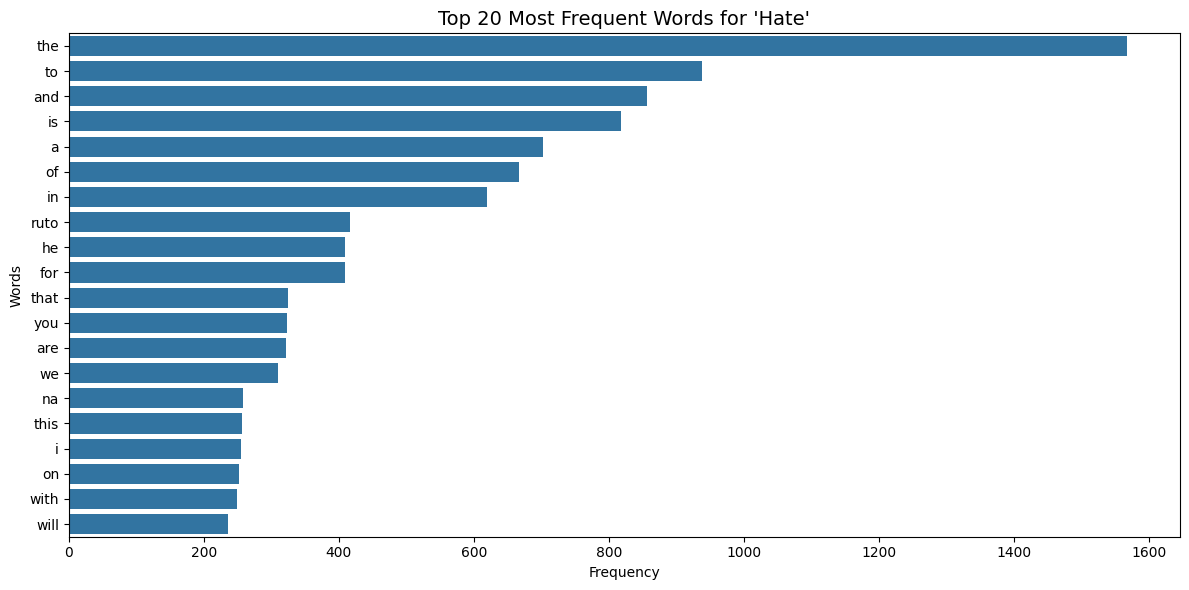

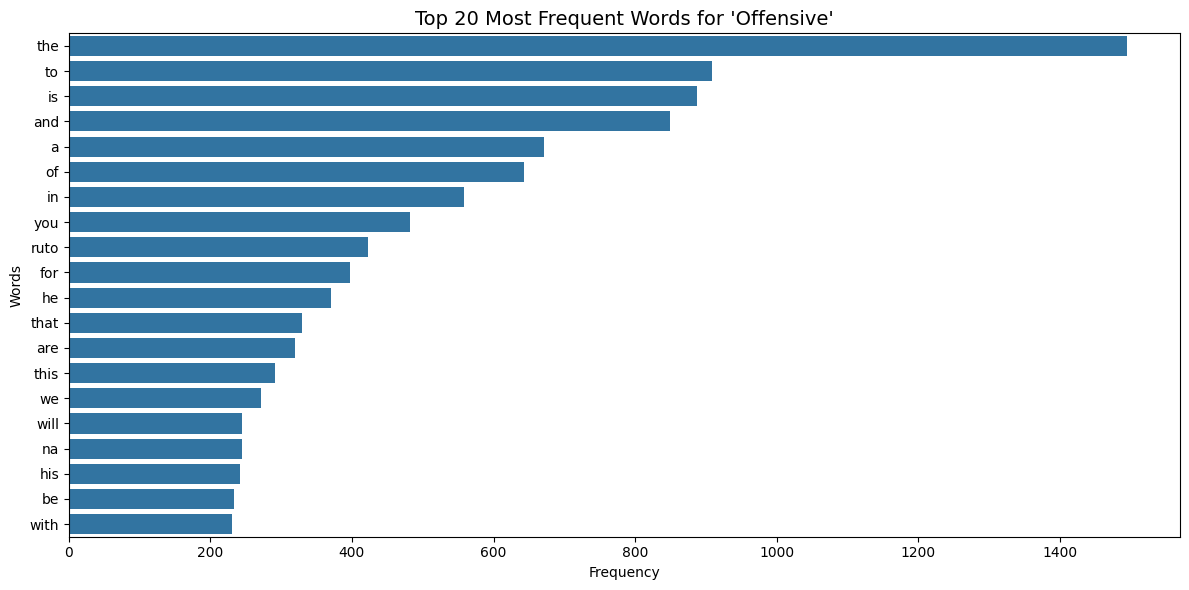

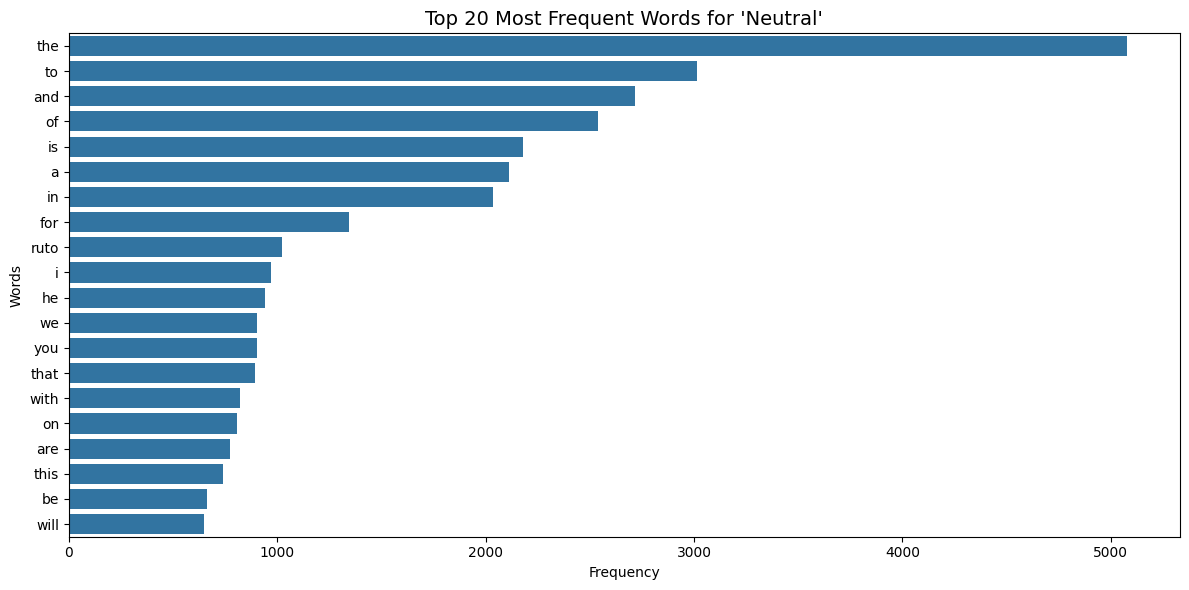

In [65]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

def plot_top_words(df, label_value, top_n=20):
    texts = df1[df1['label'] == label_value]['cleaned_text']
    all_words = " ".join(texts).split()
    word_freq = Counter(all_words)
    common_words = word_freq.most_common(top_n)

    words, freqs = zip(*common_words)

    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(freqs), y=list(words))
    plt.title(f"Top {top_n} Most Frequent Words for '{label_value.capitalize()}'", fontsize=14)
    plt.xlabel("Frequency")
    plt.ylabel("Words")
    plt.tight_layout()
    plt.show()

# Plot for each category
for category in ['hate', 'offensive', 'neutral']:
    plot_top_words(data, category)


**Observations**
1. Based on hate:

- Dominance of Stop Words: The most striking observation is that the top few words are overwhelmingly common English stop words like "the," "to," "and," "is," and "a." These words appear with very high frequency, with "the" being the most frequent by a significant margin (almost 1600 occurrences).

- Content Words Appear Lower Down: It takes until the 8th position to see a word that carries more specific meaning in this context: "ruto." This suggests that while the analysis is focused on "hate," the surrounding text likely contains a lot of standard English grammar.

- "Ruto" as a Key Entity: The word "ruto" stands out as the most frequent content word in this list, appearing over 400 times. This strongly implies that discussions related to "hate" in this dataset frequently involve or mention "Ruto," likely William Ruto, given the context from the previous word cloud.

2. Based on offensive:

- Continued Dominance of Stop Words: Similar to the previous chart for "hate," the top of this list is heavily populated by common English stop words such as "the," "to," "is," "and," and "a." "The" again has the highest frequency by a considerable margin (over 1500 occurrences).

- "Ruto" Still Present, but Lower in Rank: The name "ruto" appears in this top 20 as well, but it's positioned lower down compared to the chart for "hate" (now around the 10th position). This suggests that while "Ruto" is still a relevant entity in discussions around "offensive" language, it might be less central than in discussions about "hate" within this dataset.

3. Based on Neutral:

- Overwhelming Dominance of Stop Words: Just like the previous charts for "hate" and "offensive," this chart is also heavily dominated by common English stop words at the top. "The" has an exceptionally high frequency, exceeding 5000 occurrences. Words like "to," "and," "of," "is," and "a" also appear with very high frequencies.

- "Ruto" Still Present, but Further Down: The word "ruto" appears again, but it's even lower in the ranking compared to the "offensive" chart (around the 10th position). This suggests that while "Ruto" might be mentioned in some neutral contexts within the dataset, it's less central to discussions labeled as "neutral" than it is to those labeled as "hate" or "offensive."

## Bi-variate Analysis

### Tweet Volume by Engagement

In [66]:
# Convert 'created_at' to datetime
df1['created_at'] = pd.to_datetime(df1['created_at'])

# Group data by date
df1['date'] = df1['created_at'].dt.date

# Calculate Tweet Volume and Engagement
tweet_volume = df1.groupby('date')['cleaned_text'].count()
engagement = df1.groupby('date')['likes'].sum() + df1.groupby('date')['retweets'].sum() + df1.groupby('date')['total_replies'].sum()

### Engagement Score vs Hour / Day / Month

See when tweets get the most traction.

#### 1. Engagement Score vs Hour of Day

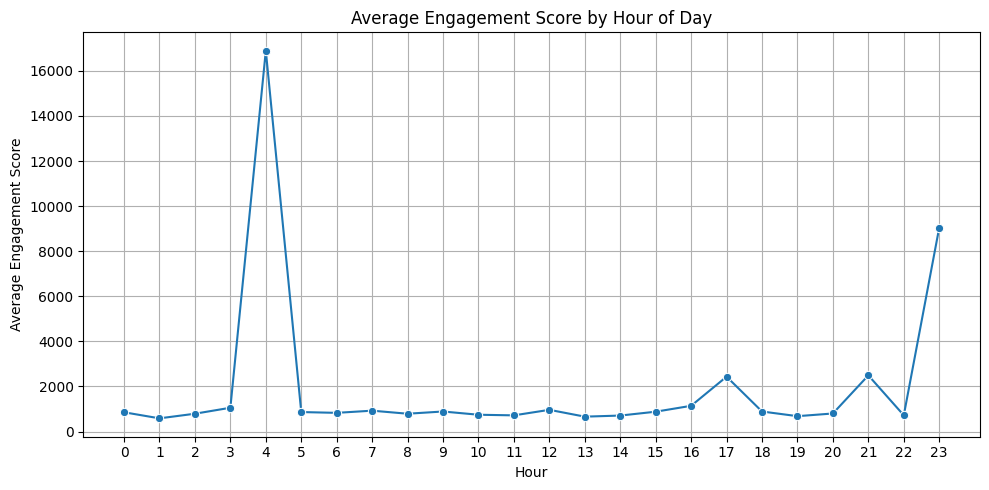

In [67]:
# Group and average engagement score by hour
hourly_engagement = df1.groupby('hour')['engagement_score'].mean()

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_engagement.index, y=hourly_engagement.values, marker='o')
plt.title('Average Engagement Score by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Average Engagement Score')
plt.grid(True)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

**Observations**

- Morning Dip: Average engagement appears relatively low in the early morning hours (around 0 to 3).
- Generally Low During Daytime: Throughout most of the daytime hours (roughly 6 to 17), the average engagement score remains relatively low and stable.
- Evening Increase: There's a noticeable increase in average engagement starting in the late afternoon/early evening (around hour 17).
- Another Peak at Hour 23: Another, though less extreme than hour 4, peak in average engagement occurs at hour 23.
- Fluctuations: The average engagement score varies throughout the day, suggesting that the time of posting can influence engagement.

#### 2. Engagement Score vs Month

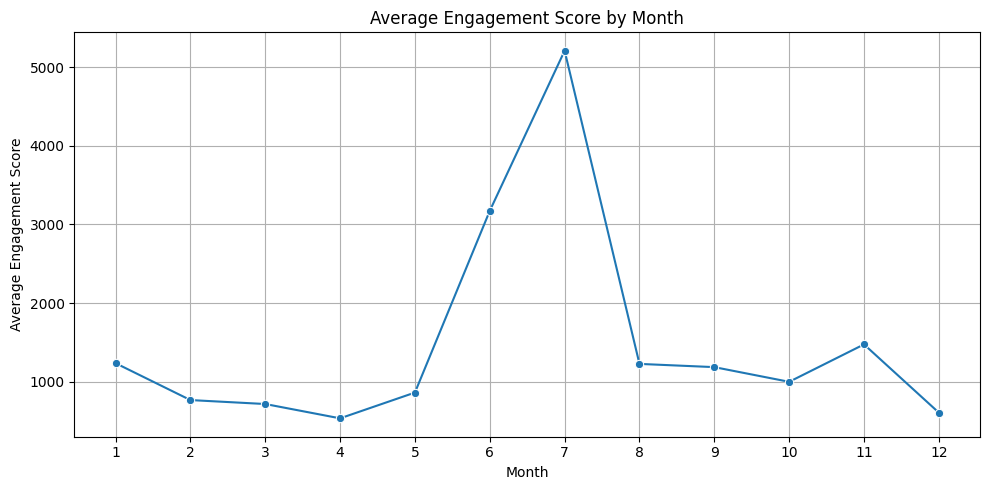

In [68]:
# Group by month
monthly_engagement = df1.groupby('month')['engagement_score'].mean()

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_engagement.index, y=monthly_engagement.values, marker='o')
plt.title('Average Engagement Score by Month')
plt.xlabel('Month')
plt.ylabel('Average Engagement Score')
plt.grid(True)
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()

**Observations**

- Peak in July (Month 7): There's a clear and significant peak in the average engagement score during the month of July.
- Low Engagement in Early Months: The average engagement appears relatively low in the first few months of the year (January to April).
- Increase Around June: There's a noticeable increase in average engagement starting around June.
- Dip After July: Following the peak in July, there's a sharp decline in average engagement in August.
- Moderate Engagement in Later Months: The average engagement fluctuates in the later months (August to December) but generally stays at a moderate level compared to the July peak.
- Seasonality Suggestion: The variations across the months hint at potential seasonality in engagement, with July being a particularly high-engagement period.

#### Engagement Score vs Holiday Name

- Do people engage more during specific holidays?

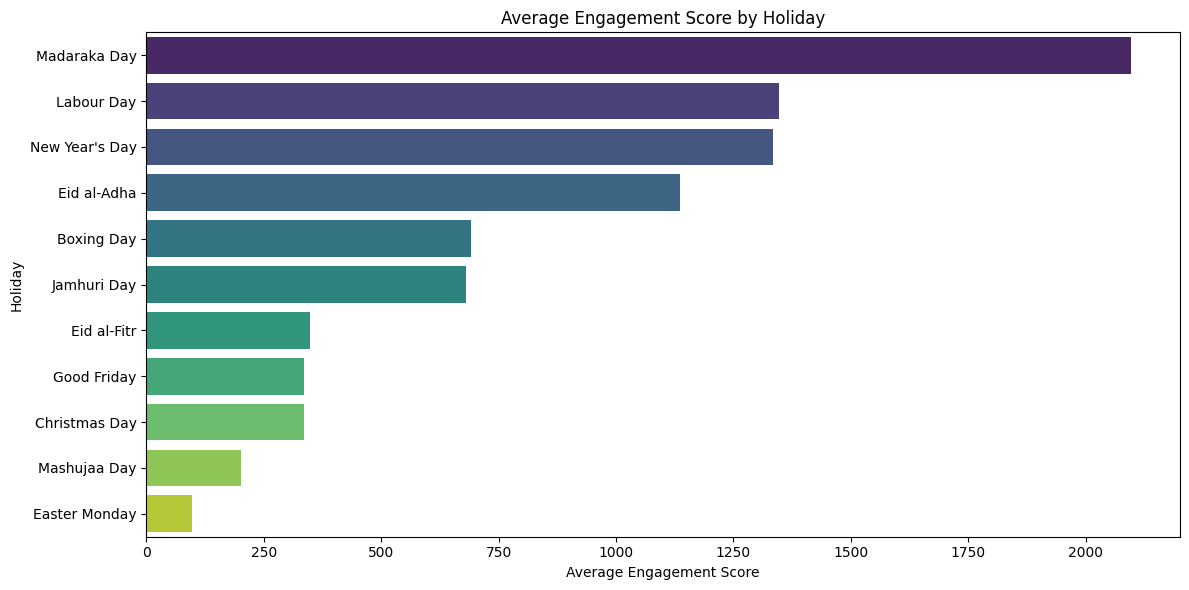

In [69]:
# Filter out non-holiday rows (if holidays are labeled as empty string or NaN)
holiday_df = df1[df1['holiday_name'].notnull() & (df1['holiday_name'] != '')]

# Group by holiday and calculate average engagement
holiday_engagement = holiday_df.groupby('holiday_name')['engagement_score'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=holiday_engagement.values, y=holiday_engagement.index, palette='viridis')
plt.title('Average Engagement Score by Holiday')
plt.xlabel('Average Engagement Score')
plt.ylabel('Holiday')
plt.tight_layout()
plt.show()

**Observations**
- Madaraka Day Leads: Madaraka Day shows the highest average engagement score, significantly higher than all other holidays.
- Labour Day and New Year's Day are High: Labour Day and New Year's Day also exhibit relatively high average engagement scores, though lower than Madaraka Day.
- Eid al-Adha Shows Moderate Engagement: Eid al-Adha has a moderate average engagement score, falling in the middle of the pack.
- Boxing Day and Jamhuri Day Similar: Boxing Day and Jamhuri Day have quite similar average engagement scores.
- Eid al-Fitr and Good Friday Lower: Eid al-Fitr and Good Friday show lower average engagement compared to the top holidays.
- Christmas Day and Mashujaa Day Even Lower: Christmas Day and Mashujaa Day have even lower average engagement scores.
- Easter Monday with the Lowest: Easter Monday has the lowest average engagement score among the listed holidays.
- Varied Engagement Across Holidays: There's a considerable range in average engagement scores across different holidays, suggesting that the specific holiday can significantly influence engagement levels.

###  Engagement Breakdown
**Likes / Retweets / Replies vs Label**

- Are negative tweets more likely to be retweeted?

- Do positive tweets get more likes?

- Are replies more common on neutral tweets?

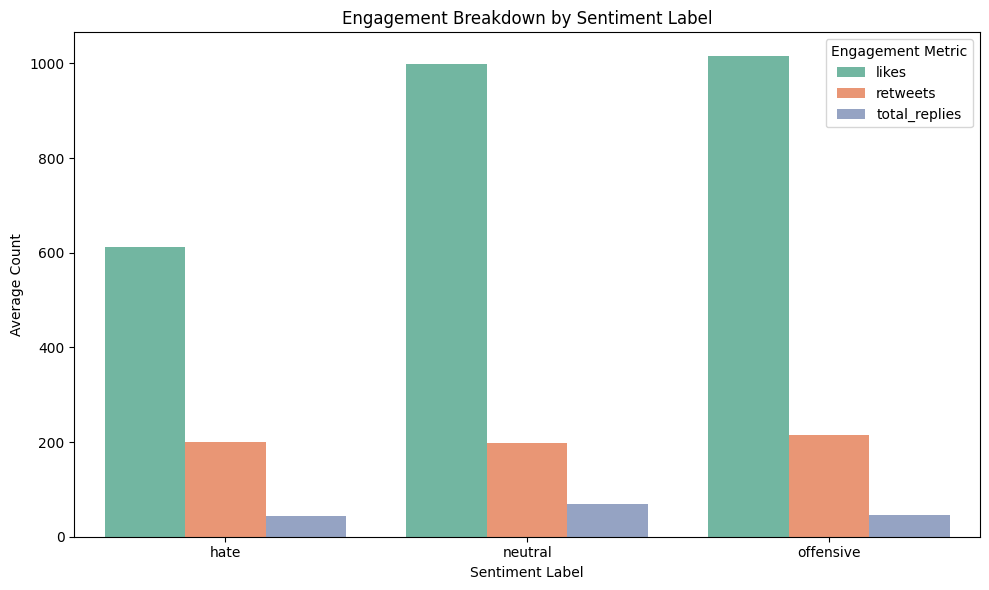

In [70]:
# Group by sentiment label and calculate average likes, retweets, and replies
engagement_metrics = df1.groupby('label')[['likes', 'retweets', 'total_replies']].mean().reset_index()

# Melt for seaborn compatibility
engagement_melted = engagement_metrics.melt(id_vars='label',
                                             value_vars=['likes', 'retweets', 'total_replies'],
                                             var_name='Metric', value_name='Average Count')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=engagement_melted, x='label', y='Average Count', hue='Metric', palette='Set2')
plt.title('Engagement Breakdown by Sentiment Label')
plt.xlabel('Sentiment Label')
plt.ylabel('Average Count')
plt.legend(title='Engagement Metric')
plt.tight_layout()
plt.show()

**Observations**
- Likes Consistently Highest: Across all sentiment labels (hate, neutral, offensive), the average number of likes is significantly higher than the average number of retweets and total replies.

- Neutral Posts Have Highest Like Counts: Posts labeled as "neutral" have the highest average number of likes compared to "hate" and "offensive" posts.

- Retweets Relatively Stable: The average number of retweets is fairly consistent across all three sentiment labels, showing only a slight variation.

- Replies Lowest Across All: The average number of total replies is the lowest among the three engagement metrics for all sentiment categories.

- Neutral Posts Have Highest Replies: Similar to likes, "neutral" posts also have the highest average number of total replies, although the difference compared to "hate" and "offensive" is less pronounced than with likes.

- "Hate" Shows Lowest Engagement Overall (Normalized by Count): While likes are still highest for "hate" posts, when looking at the relative scale of all three metrics, "hate" posts tend to have a lower overall engagement compared to "neutral" and "offensive" posts within this visualization's representation of average counts.

#### Likes / Retweets vs Time Features (hour, day, month)

Understand timing of virality.

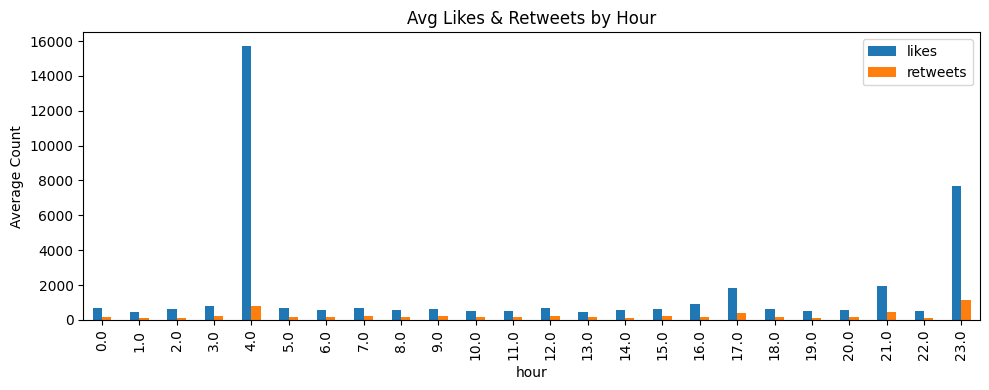

In [71]:
# Likes & Retweets by Hour
df1.groupby('hour')[['likes', 'retweets']].mean().plot(kind='bar', figsize=(10, 4))
plt.title('Avg Likes & Retweets by Hour')
plt.ylabel('Average Count')
plt.tight_layout()
plt.show()

**Observations**

- Dominance of Likes: Across almost all hours, the average number of likes is significantly higher than the average number of retweets. This reinforces the earlier observation that likes are the most frequent form of engagement.

- Sharp Spike in Likes at Hour 4: There's a very prominent spike in the average number of likes at hour 4. This hour stands out as having exceptionally high like engagement compared to all other hours.

- Smaller Increase in Likes at Hour 23: We also see a noticeable, though less extreme than hour 4, increase in the average number of likes at hour 23.

- Relatively Low and Stable Retweets: The average number of retweets remains relatively low and stable throughout most of the day, with no dramatic spikes comparable to the likes.

- Slight Increase in Retweets at Hour 23: Similar to likes, there's a small increase in the average number of retweets at hour 23, though it's much less pronounced.

- Morning Dip in Likes: The average number of likes is generally lower in the very early morning hours (around 0 to 3).

- Daytime Consistency: During most of the daytime hours (roughly 6 to 17), the average number of both likes and retweets stays at a relatively consistent and low level.

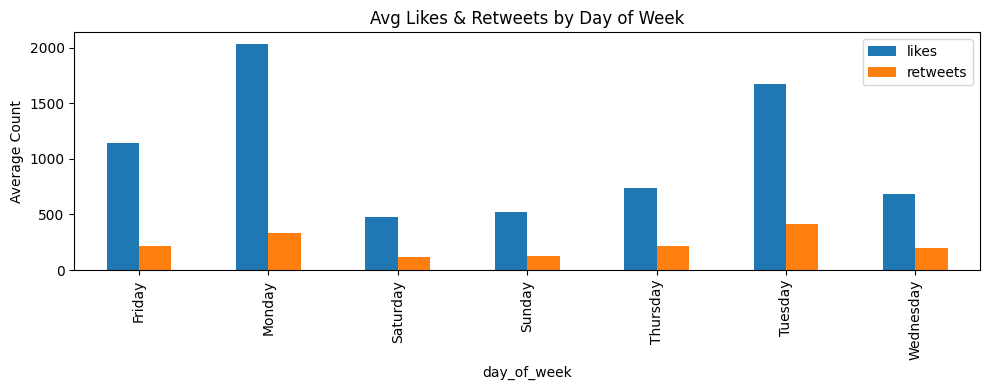

In [72]:
# Likes & Retweets by Day of Week
df1.groupby('day_of_week')[['likes', 'retweets']].mean().plot(kind='bar', figsize=(10, 4))
plt.title('Avg Likes & Retweets by Day of Week')
plt.ylabel('Average Count')
plt.tight_layout()
plt.show()

**Observations**
- Likes Consistently Higher: Just like the hourly data, the average number of likes is higher than the average number of retweets for every day of the week.

- Monday Shows Highest Likes: Monday has the highest average number of likes, standing out significantly from the other days.

- Tuesday Also High in Likes: Tuesday also shows a relatively high average number of likes, though not as high as Monday.

- Lowest Likes on Saturday: Saturday exhibits the lowest average number of likes.

- Retweets Follow a Similar Trend (but Lower): The pattern of retweets across the week somewhat mirrors the likes, with Monday and Tuesday having higher average retweet counts compared to Saturday, which has the lowest. However, the differences in retweet counts between the days are less dramatic than the differences in like counts.

- Mid-Week Dip: There appears to be a slight dip in average likes and retweets around the middle of the week (Wednesday and Thursday) before picking up again towards the beginning of the week.

- Weekend Lows: Both average likes and retweets tend to be lower on the weekend (Saturday and Sunday) compared to weekdays.

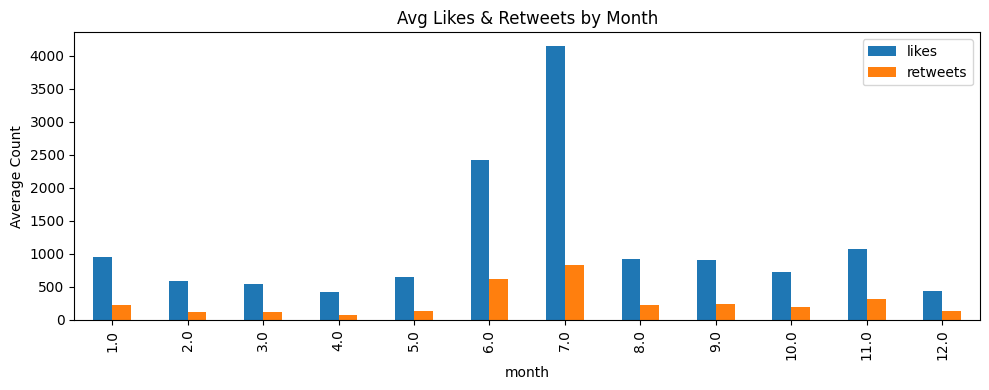

In [73]:
# Likes & Retweets by Month
df1.groupby('month')[['likes', 'retweets']].mean().plot(kind='bar', figsize=(10, 4))
plt.title('Avg Likes & Retweets by Month')
plt.ylabel('Average Count')
plt.tight_layout()
plt.show()

**Observations**

- Likes Consistently Higher: Across all months, the average number of likes is notably higher than the average number of retweets. This aligns with previous observations.

- Peak in Likes in July (Month 7): July exhibits a significant peak in the average number of likes, standing out considerably from the other months.

- Increase in Likes Around June: There's a noticeable increase in the average number of likes starting around June, leading up to the July peak.

- Retweets Peak in July as Well: The average number of retweets also peaks in July, coinciding with the peak in likes, although the increase is less dramatic relative to the baseline.

- Generally Lower Engagement in Early Months: The average number of both likes and retweets tends to be lower in the earlier months of the year (January to April).

- Moderate Engagement in Later Months: Following the July peak, the average engagement for both likes and retweets generally returns to more moderate levels for the remaining months of the year.

- Similar Monthly Trends: The trends for average likes and retweets across the months appear somewhat similar, suggesting that months with higher like counts also tend to have higher retweet counts.

#### Engagement Score vs Politician

Which politicians trigger more public interaction?

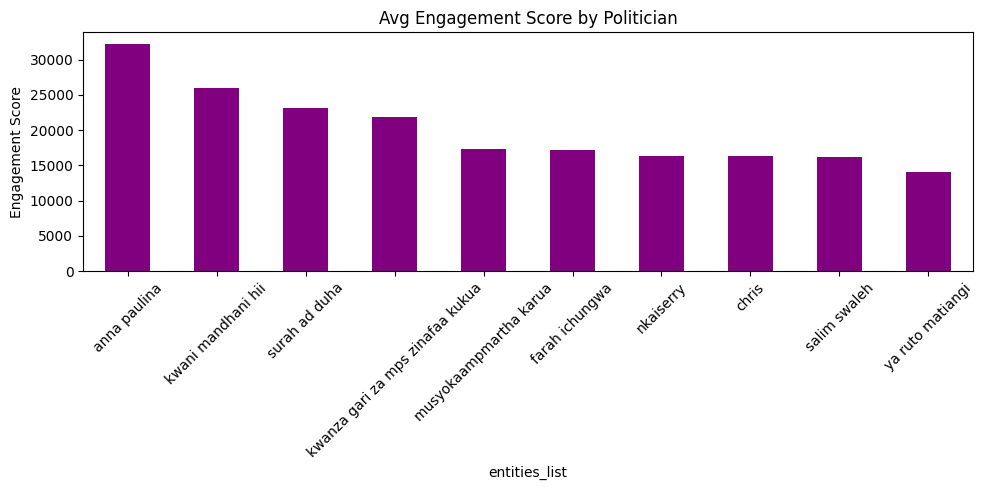

In [74]:
# Ensure 'entities' column is clean and split
df1['entities'] = df1['entities'].fillna('')
df1['entities_list'] = df1['entities'].str.lower().str.split(',')

# Explode to have one row per politician mention
df_exploded = df1.explode('entities_list')
df_exploded['entities_list'] = df_exploded['entities_list'].str.strip()

# Group and get average engagement score per politician
engagement_by_politician = df_exploded.groupby('entities_list')['engagement_score'].mean().sort_values(ascending=False).head(10)

# Plot
engagement_by_politician.plot(kind='bar', figsize=(10,5), color='purple')
plt.title('Avg Engagement Score by Politician')
plt.ylabel('Engagement Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Observations**

- Anna Paulina Leads: Anna Paulina has the highest average engagement score, significantly higher than all other listed politicians.

- Kwani Mandhani Hii Second Highest: Kwani Mandhani Hii shows the second-highest average engagement score.

- Gradual Decline Afterwards: Following the top two, there's a gradual decline in the average engagement scores for the subsequent politicians: Surah Ad Duha, Kwanza Gari Za MPs Zinafaa Kukua, Musyokaampmartha Karua, Farah Ichungwa, Nkaiserry, Chris, Salim Swaleh, and Ya Ruto Matiangi.

- Ya Ruto Matiangi Lowest: Ya Ruto Matiangi has the lowest average engagement score among the politicians displayed.

- Noticeable Drop from Top Two: There's a noticeable drop in average engagement from the top two politicians to the rest of the group.

- Relatively Similar Scores for the Middle Group: The average engagement scores for the politicians ranked from third (Surah Ad Duha) to around eighth (Chris) are relatively closer to each other compared to the top two.

### Sentiment / Hate Label vs Time / Activity
#### Label vs Hour / Day / Month

When is hate speech most likely?



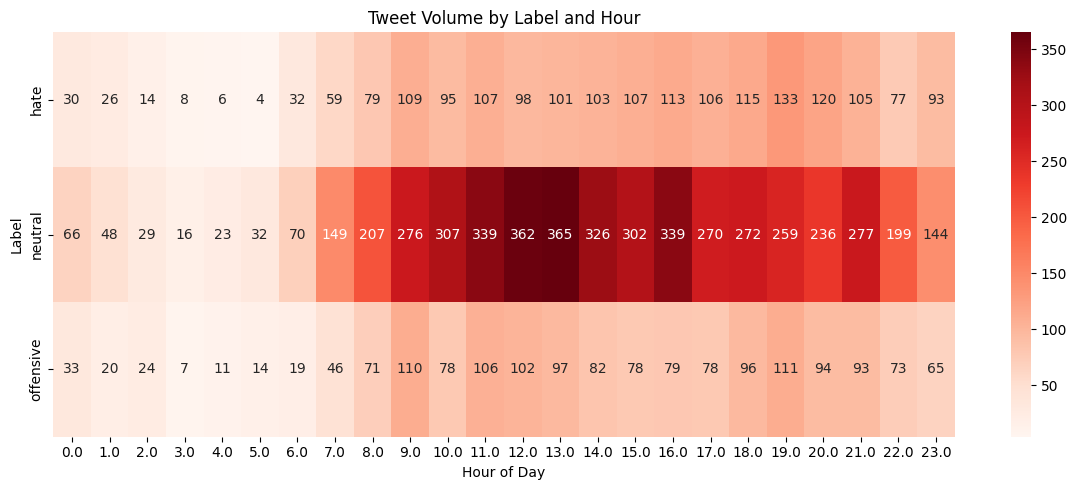

In [75]:
# Create a pivot table: count of tweets by label and hour
heatmap_data = df1.pivot_table(index='label', columns='hour', values='cleaned_text', aggfunc='count', fill_value=0)

# Plot
plt.figure(figsize=(12, 5))
sns.heatmap(heatmap_data, cmap='Reds', annot=True, fmt='d')
plt.title('Tweet Volume by Label and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Label')
plt.tight_layout()
plt.show()

**Observations**

- Neutral Tweets Dominate: Across all hours of the day, the volume of tweets labeled as "neutral" is significantly higher than the volume of tweets labeled as "hate" or "offensive." This is visually represented by the darker red band in the "neutral" row.

- Peak Tweet Volume Around Midday for Neutral: The volume of "neutral" tweets appears to peak around the middle of the day, roughly between hours 9 and 15, showing the darkest shades of red in that row.

- Lower and More Consistent Volume for Hate and Offensive: The volume of tweets labeled as "hate" and "offensive" is considerably lower across all hours compared to "neutral." The color intensity in these rows is much lighter.

- Slight Increase in Hate and Offensive Tweets During Daytime: While still low compared to "neutral," there seems to be a slight increase in the volume of "hate" and "offensive" tweets during the daytime hours (roughly 7 to 22) compared to the very early morning.

- Early Morning Low for All Labels: The tweet volume for all three labels ("hate," "neutral," "offensive") is generally lower in the very early morning hours (around 0 to 6).

- Hour-to-Hour Variation: There is some hour-to-hour variation in tweet volume within each label, but the overall trend of "neutral" being highest and relatively consistent patterns for "hate" and "offensive" holds.

#### Label vs Holiday

Is hate speech more or less common on holidays?

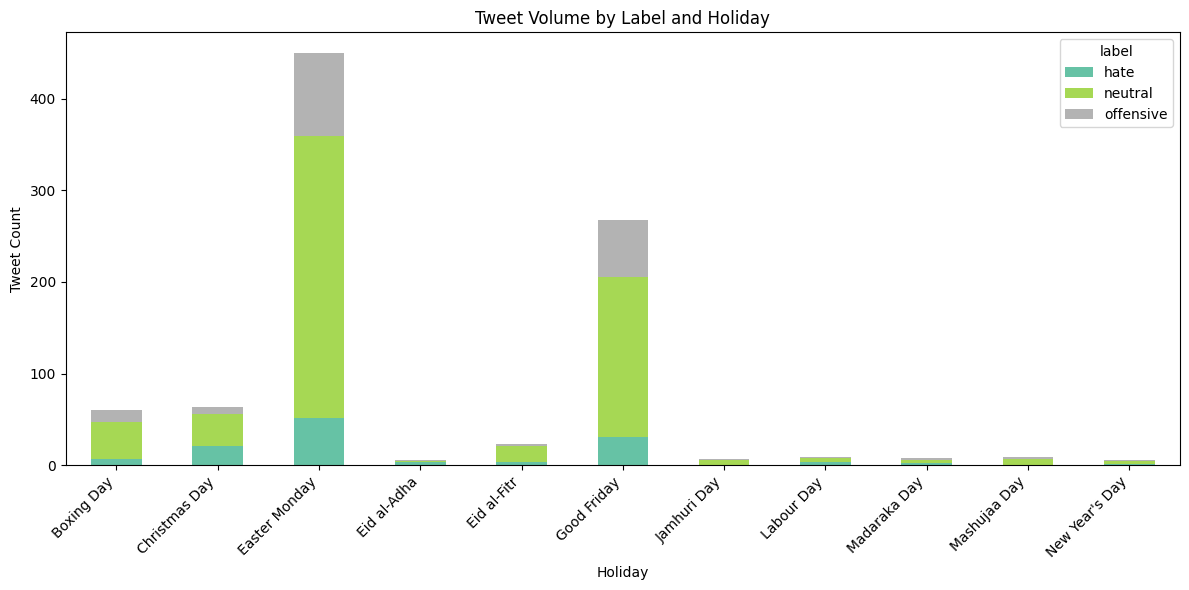

In [76]:
# Count tweets by label and holiday name
label_holiday_counts = df1.groupby(['holiday_name', 'label']).size().unstack().fillna(0)

# Plot
label_holiday_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')
plt.title('Tweet Volume by Label and Holiday')
plt.xlabel('Holiday')
plt.ylabel('Tweet Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Observations**
- Neutral Tweets Highest Overall: Across most holidays, the volume of tweets labeled "neutral" (represented by the yellow-green portion of the bars) is the highest compared to "hate" (teal) and "offensive" (grey).

- Significant Neutral Volume on Easter Monday: Easter Monday shows a particularly high volume of "neutral" tweets, dwarfing the volume of other labels on that day and standing out as the holiday with the most overall tweets.

- Good Friday Also Has Notable Neutral Volume: Good Friday also exhibits a relatively high volume of "neutral" tweets.

- Hate and Offensive Tweets Generally Low: The volume of tweets labeled as "hate" and "offensive" is generally low across all the listed holidays.

- Slightly Higher Hate Volume on Easter Monday and Good Friday: While still low compared to "neutral," there's a slightly higher volume of "hate" tweets observed on Easter Monday and Good Friday compared to other holidays.

- Offensive Tweets Relatively Consistent and Low: The volume of "offensive" tweets remains consistently low across all the holidays shown.

- Low Tweet Volume on Most Other Holidays: The tweet volume for all three labels is generally quite low on most of the other holidays, such as Boxing Day, Christmas Day, Eid al-Adha, Eid al-Fitr, Jamhuri Day, Labour Day, Madaraka Day, Mashujaa Day, and New Year's Day.

#### Tweet Volume by Sentiment

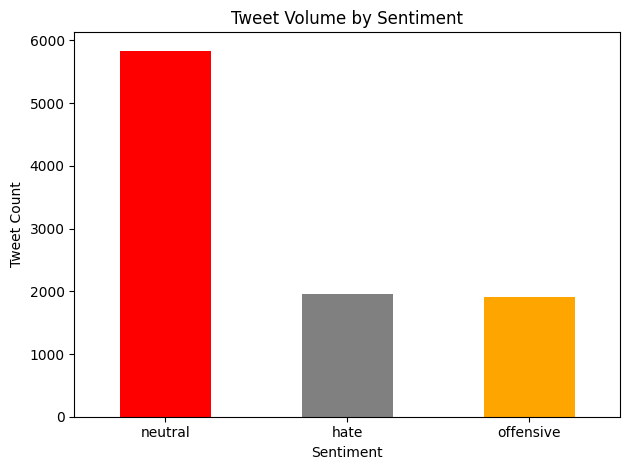

In [77]:
# Count tweets per sentiment
df1['label'].value_counts().plot(kind='bar', title='Tweet Volume by Sentiment', color=['red', 'gray', 'orange'])
plt.xlabel('Sentiment')
plt.ylabel('Tweet Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Observations**
- Neutral Tweets are the Most Frequent: The red bar representing "neutral" tweets is significantly taller than the other bars, indicating that the largest volume of tweets in this dataset is labeled as neutral.

- Hate Tweets are the Least Frequent: The grey bar representing "hate" tweets is the shortest, showing that tweets classified as hate have the lowest volume compared to neutral and offensive tweets.

- Offensive Tweets are Intermediate: The orange bar for "offensive" tweets falls between the other two, indicating a moderate volume of tweets labeled as offensive, higher than "hate" but lower than "neutral."

## Multi-variate Analysis

### Engagement by Label categories

In [78]:
# Melt individual engagement types
long_df = pd.melt(
    df1,
    id_vars='label',
    value_vars=['likes_bin', 'retweets_bin', 'replies_bin'],
    var_name='engagement_type',
    value_name='bin_value'
)

# Clean up engagement type names
long_df['engagement_type'] = long_df['engagement_type'].str.replace('_bin', '').str.capitalize()

# Append the combined engagement data
comb_engagement_df = df1[['label', 'engagement_bin']].rename(columns={'engagement_bin': 'bin_value'})
comb_engagement_df['engagement_type'] = 'Total'
long_df = pd.concat([long_df, comb_engagement_df], ignore_index=True)

# Plotly faceted bar chart with combined engagement
fig = px.histogram(
    long_df,
    x='bin_value',
    color='label',
    facet_col='engagement_type',
    category_orders={
        'bin_value': ['0', '1-10', '11-100', '101-1k', '1001-10k', '10k+'],
        'engagement_type': ['Likes', 'Retweets', 'Replies', 'Total']
    },
    color_discrete_sequence=px.colors.qualitative.Set2,
    barmode='group',
    title="Tweet Labels by Engagement Type and Bin (Including Total)",
    labels={'bin_value': 'Engagement Bin', 'count': 'Tweet Count'},
    height=1000,
    width=2400
)

fig.update_layout(
    showlegend=True,
    legend_title_text='Label'
)

fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))  # Clean up facet titles

fig.show()


**Observations**:

1. Neutral tweets dominate all engagement types and bins.

2. Offensive and hate tweets tend to cluster more in lower engagement bins.

3. The number of tweets sharply drops in higher engagement bins across all categories.

**Insights from Likes**

1. Most tweets with no likes (bin 0) are neutral, but a significant number are also offensive or hate.

2. As engagement increases, neutral tweets become even more dominant.

3. Very few hate or offensive tweets receive 10k+ likes.

**Insights from Retweets**

1. Similar pattern to likes: neutral tweets are most common, even more so in higher bins.

2. Very few offensive or hate tweets make it past the 101-1k retweet range.

3. No hate or offensive tweets in the 10k+ retweet bin.

**Insights from Replies**

1. Replies show a higher proportion of offensive and hate tweets, especially at 0 and 1–10 reply bins.

2. Still, neutral tweets dominate in total count, especially in the 1–100 reply range.

3. A steep drop-off in all categories beyond the 101–1k bin.

**Insights from Total Engagement**

1. The total view mirrors the trends from individual categories:

2. Neutral tweets are consistently the most engaged.

3. Offensive and hate tweets are far less likely to receive high engagement.


### Word count vs text length per label category

In [79]:
# Calculate mean word count and mean text length per label
mean_stats = df1.groupby('label')[['word_count', 'text_length']].mean().reset_index()

# Melt to long format for grouped bar plot
mean_stats_melted = mean_stats.melt(id_vars='label', var_name='Metric', value_name='Mean Value')

# Create grouped bar chart
fig = px.bar(
    mean_stats_melted,
    x='label',
    y='Mean Value',
    color='Metric',
    barmode='group',
    text='Mean Value',
    color_discrete_sequence=px.colors.qualitative.Set2,
    title='Mean Word Count and Text Length per Tweet Label',
    labels={'label': 'Tweet Label', 'Mean Value': 'Mean'}
)

# Update layout for aesthetics
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(
    yaxis_title='Mean Value',
    xaxis_title='Label',
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    height=500,
    width=800
)

fig.show()

**Observations**

1. Text Length (in characters):

Hate tweets - (137.87)

Neutral tweets - (135.69)

Offensive tweets - (133.42)

- Suggests that hate tweets tend to be slightly longer, possibly due to more elaborate or emotionally charged language.

- The average tweet length falls between 130-140 characters for all categories

2. Word Count:

Hate tweets - (23.82),

Offensive - (23.28)

neutral tweets - (23.10)

- The variation is relatively small but may indicate that hate and offensive tweets use slightly more words, possibly to express more complex or heated messages.

- The average tweeet word count fallls between 23-24 words for all categories.


### Distribution of Word count vs text length per label category

In [80]:
# Scatter plot with trendlines by label using Plotly
fig = px.scatter(
    df1,
    x='word_count',
    y='text_length',
    color='label',
    trendline='ols',
    opacity=0.6,
    size_max=10,
    title="Word Count vs. Text Length with Trendlines by Label",
    width=1000,
    height=700
)

# Update layout for labels and better appearance
fig.update_layout(
    xaxis_title="Word Count",
    yaxis_title="Text Length (Characters)",
    legend_title="Label"
)

fig.show()

**Observations**

1. Positive Correlation:

- A positive trend line across most or all categories suggests that as tweet length increases, the number of words also increases.

- This makes intuitive sense: longer tweets can hold more words.

2. Category Differences:

- Some categories tend to use longer or more complex words (lower word count for same tweet length).

- Others may use shorter, more concise language (higher word count for same tweet length).


3. Outliers:

- Points far from the trend line could be outliers most likely spam content, unusually wordy or concise tweets.

4. Compactness of Categories:

- Tightly clustered points imply similar writing style or length.

In [81]:
# Create the correlation matrix
corr_matrix = df[['likes', 'retweets', 'total_replies']].corr()

# Create the heatmap using Plotly
fig = go.Figure(data=go.Heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns,
    y=corr_matrix.index,
    colorscale='Viridis',  # You can choose other color scales like 'Cividis', 'Plasma', etc.
    colorbar=dict(title='Correlation'),
))

# Update layout to customize the dimensions
fig.update_layout(
    title="Correlation Heatmap of Likes, Retweets & Replies",
    xaxis_title="Features",
    yaxis_title="Features",
    xaxis=dict(tickmode='array'),
    yaxis=dict(tickmode='array'),
    width=800,  # Adjust the width of the heatmap
    height=600  # Adjust the height of the heatmap
)

fig.show()


**Observations**

1. Strong Positive Correlation Between Likes and Retweets

Correlation ≈ 0.95+ (very close to 1)

Indicates that tweets getting more likes are also highly likely to be retweeted, and vice versa.

These two features are likely reflecting similar audience engagement behaviors.

2. Moderate Correlation Between Retweets and Replies
The value seems lower (around ~0.76).

Suggests that while retweeted tweets may get replies, it's not as tightly linked as likes/retweets.

Retweets may spread content but not always spark conversation.

3. Lowest Correlation Between Likes and Replies
The correlation here is the weakest among the three pairs.

Implies that just because a tweet is liked doesn’t mean it generates a reply or discussion.

# Preprocessing

## ML preprocessing

In [82]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix


In [83]:
# Download necessary NLTK resources
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

# Define stopwords for English, Swahili, and Sheng
english_stopwords = set(stopwords.words('english'))
swahili_stopwords = set(["a",
    "akasema",
    "alikuwa",
    "alisema",
    "baadhi",
    "bila",
    "bwana",
    "hadi",
    "hata",
    "hii",
    "hivi",
    "huo",
    "ili",
    "ilikuwa",
    "juu",
    "kama",
    "karibu",
    "katika",
    "kila",
    "kisha",
    "kwamba",
    "kwani",
    "kwa",
    "kwanza",
    "lakini",
    "maana",
    "mimi",
    "mingi",
    "mmoja",
    "ndani",
    "ng'ambo",
    "nini",
    "nonkwe",
    "pamoja",
    "pia",
    "sana",
    "sasa",
    "sawa",
    "si",
    "sio",
    "tangu",
    "tena",
    "tu",
    "vile",
    "wa",
    "wako",
    "walikuwa",
    "waliosema",
    "wanasema",
    "watu",
    "wengine",
    "wote",
    "ya",
    "yake",
    "yao",
    "yeye",
    "yu",
    "za",
    "zake",
    "zile",
    "zingine"

])


# Combine stopwords
all_stopwords = english_stopwords.union(swahili_stopwords)

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove numbers and punctuation
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize text
    tokens = word_tokenize(text)

    # Remove stopwords and apply lemmatization
    filtered_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in all_stopwords]

    # Return the cleaned text
    return ' '.join(filtered_tokens)

# Example usage on your dataset
df1['preprocessed_text'] = df1['cleaned_text'].apply(preprocess_text)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [84]:


# Step 1: TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(df1['preprocessed_text'])  # Features
y = df1['label']                                               # Target labels

# Step 2: Train-test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


# Modeling

Modeling is a crucial phase in any data science project, where the goal is to develop a mathematical or computational representation of the underlying patterns within the data. This phase involves selecting the appropriate algorithms, training the models, and evaluating their performance to ensure they generalize well to unseen data.

### Why is Modeling Important?
1. Prediction and Inference: Models help in predicting future outcomes and inferring relationships within the data.

2. Decision-Making: Accurate models support data-driven decisions.

3. Optimization: Models can be used to optimize processes or outcomes.

## Machine Learning **Models**

Machine Learning (ML) is a branch of Artificial Intelligence (AI) that enables computers to learn from data and improve their performance over time without being explicitly programmed. In ML, algorithms identify patterns in data, make predictions, and adapt to new information.



### **Model Initialization**

 Download a Python file called text_classifier.py from GitHub and save it locally in your Colab at /content/text_classifier.py.

In [85]:
!wget https://raw.githubusercontent.com/kennethnyangweso/CAPSTONE-PROJECT/main/text_classifier.py -O /content/text_classifier.py

--2025-04-27 18:14:40--  https://raw.githubusercontent.com/kennethnyangweso/CAPSTONE-PROJECT/main/text_classifier.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18096 (18K) [text/plain]
Saving to: ‘/content/text_classifier.py’

/content/text_class 100%[===================>]  17.67K  --.-KB/s    in 0.001s  

2025-04-27 18:14:40 (20.4 MB/s) - ‘/content/text_classifier.py’ saved [18096/18096]



This file contains the best models to perform text classification. It simplifies the modeling process by reducing the volume of code required to run the models while still maintaining effective running of the models.


In [86]:
with open('/content/text_classifier.py', 'r') as file:
    content = file.read()

print(content)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Dict, List, Tuple, Optional, Union

from sklearn.base import BaseEstimator
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, learning_curve
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline


class TextClassifier:
    """A class for training and evaluating multiple text classification models.
    
    This version ass

The loaded file has a modeling pipeline to run the models, hyperparameter tune them and evaaluate them.

In [87]:
# Step 1: Add path
import sys
sys.path.append('/content')
# Step 2: Import
from text_classifier import TextClassifier

# Step 3: Now you can create an instance
classifier = TextClassifier(random_state=42)

# Step 4: Add models, train, evaluate etc.
classifier.add_default_models()

### **Base models**

The pipeline contains 6 default models ie :

*  Naive Bayes
*  Logistic Regression
*  Linear SVM
*  Random Forest
*  Gradient Boosting
*  Neural Network

In [90]:
#Train the base text classifiers
classifier.train_all_models(X_train, y_train, handle_imbalance=True)

Training Naive Bayes...
Training Logistic Regression...
Training Linear SVM...
Training Random Forest...
Training Gradient Boosting...
Training Neural Network...


{'Naive Bayes': MultinomialNB(),
 'Logistic Regression': LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
 'Linear SVM': LinearSVC(class_weight='balanced', random_state=42),
 'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42),
 'Gradient Boosting': GradientBoostingClassifier(random_state=42),
 'Neural Network': MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)}

#### *Evaluate the base models*

Evaluating Naive Bayes...
Evaluating Logistic Regression...
Evaluating Linear SVM...
Evaluating Random Forest...
Evaluating Gradient Boosting...
Evaluating Neural Network...

Best model: Gradient Boosting with F1 score: 0.4541
Model: Naive Bayes
Accuracy: 0.5125
F1 Score: 0.4484


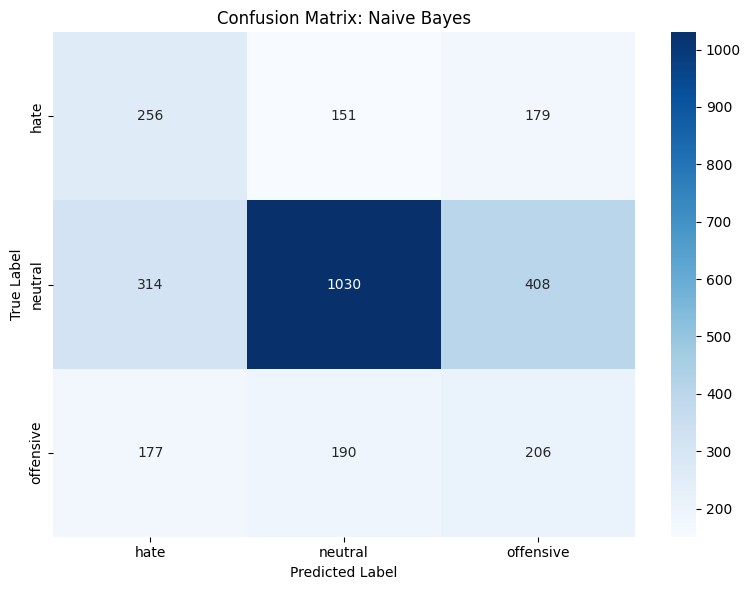

Model: Logistic Regression
Accuracy: 0.5077
F1 Score: 0.4293


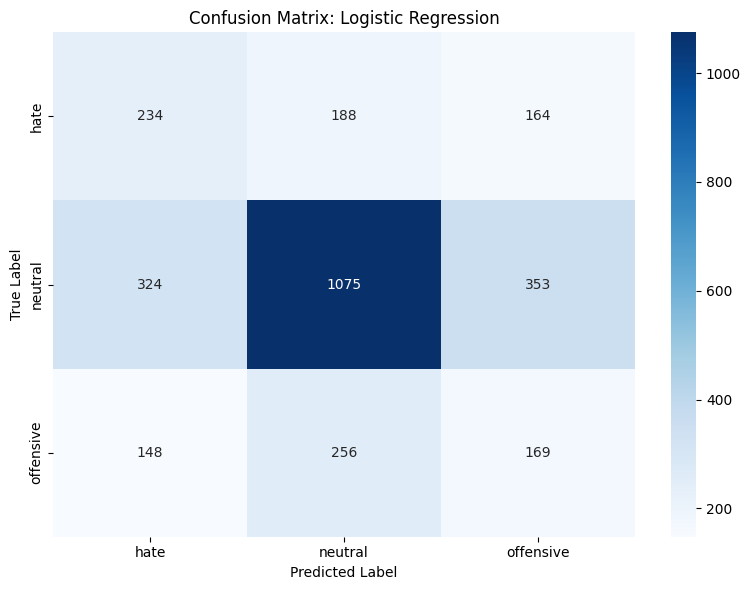

Model: Linear SVM
Accuracy: 0.4758
F1 Score: 0.3916


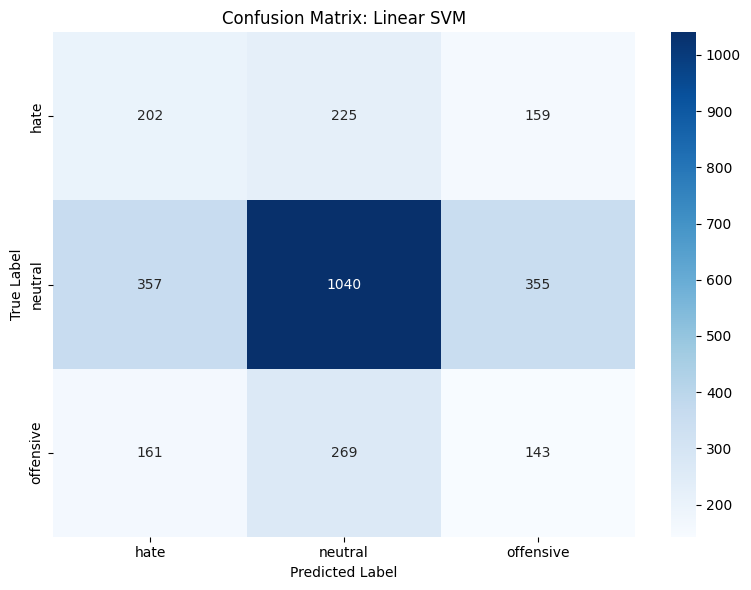

Model: Random Forest
Accuracy: 0.5266
F1 Score: 0.4089


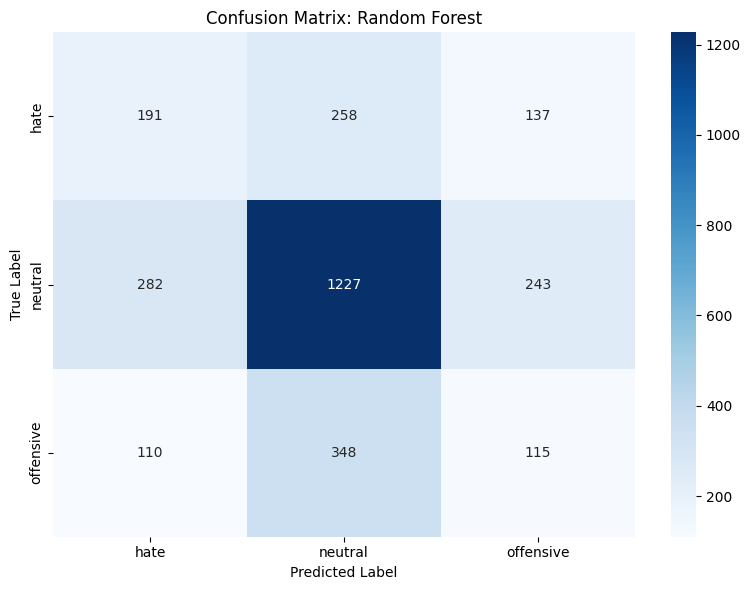

Model: Gradient Boosting
Accuracy: 0.5026
F1 Score: 0.4541


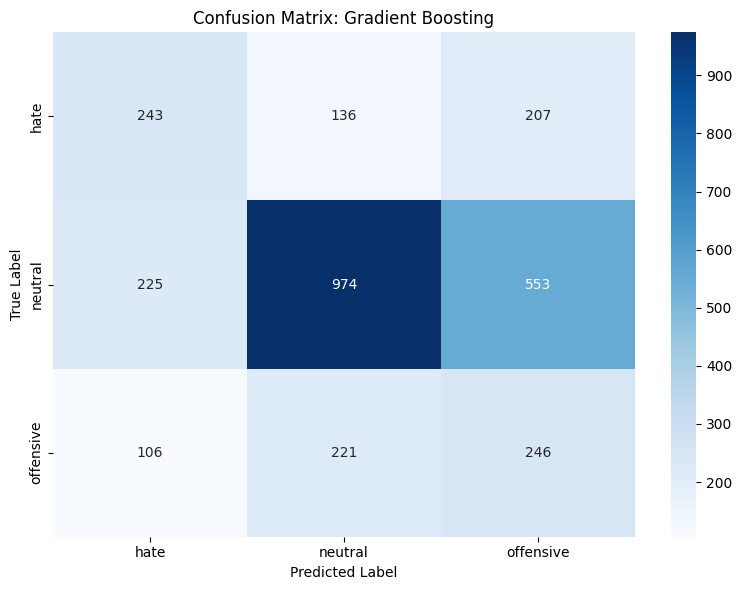

Model: Neural Network
Accuracy: 0.4425
F1 Score: 0.3604


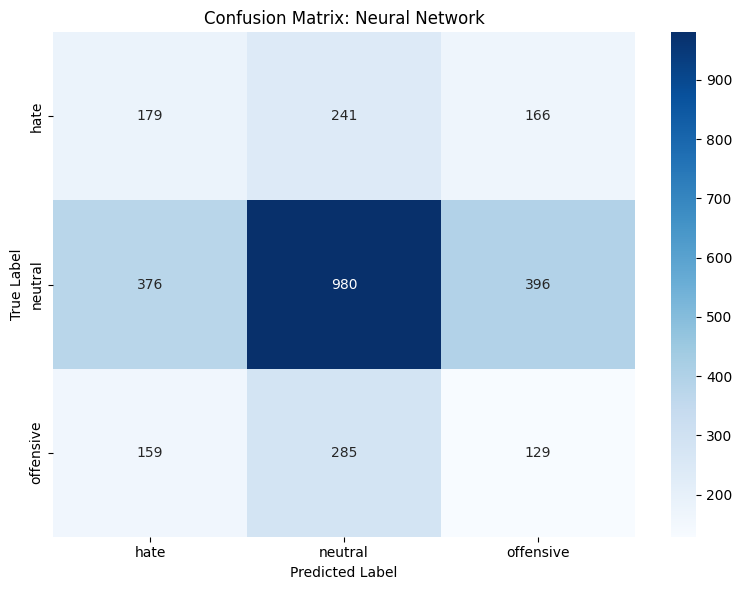

In [91]:
# Get unique class labels
class_names = np.unique(y_test)

# Evaluate each model
results = classifier.evaluate_all_models(X_test, y_test)

# Plot function
def plot_confusion_matrix(cm, class_names, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title(f"Confusion Matrix: {title}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()

# Print and plot the evaluation results
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print(f"F1 Score: {result['f1_score']:.4f}")

    # Get confusion matrix
    cm = result['confusion_matrix']


    # Plot confusion matrix
    plot_confusion_matrix(cm, class_names=class_names, title=model_name)




The best base model on ***F1_score*** is  **Gradient Boosting** with F1 score: **0.4541**. However the f1_score is too low meaning which shows it is struggling to differentiate between classes. The best way forward is to perform a hyperparameter search on the base models to get the best performing parameters for the model.


### Hyperparameter tuning

Above we can see the models performed very poorly from the low accuracy and F1 score. We attempt to tune the hyperparameters to get the parameters that will give us the best accuracy. The default cross validation search method for our pipeline is a **GridsearchCV**.

#### ***Niave Bayes***

In [ ]:
param_grid_nb = {
    'alpha': [0.1, 0.5, 1.0,10, 100],   # Regularization parameter
    'fit_prior': [True, False], # Whether to learn class prior probabilities or not
    'force_alpha': [True, False] # Force smoothing even when alpha=0
}


best_nb = classifier.tune_hyperparameters("Naive Bayes", param_grid_nb,X_train, y_train,cv=5, scoring="f1_macro")



Best parameters for Naive Bayes: {'alpha': 1.0, 'fit_prior': False, 'force_alpha': True}
Best f1_macro score: 0.4602


The f1 score for naive Bayes model is relatively low ie 0.4602 which is < 50% which means the model is misclassifying.

#### ***Support Vector Machine***

In [92]:
#Define the parameter grid
param_grid_svc = {
    'C': [0.01, 0.1, 1, 10, 100],            # Regularization parameter
    'class_weight': ['balanced', None], # Handle class imbalance
    'max_iter': [1000, 5000, 10000]      # Because LinearSVC sometimes needs more iterations
}
# Search best parameters giving highest F1 score
best_svc = classifier.tune_hyperparameters("Linear SVM", param_grid_svc,X_train, y_train,cv=5, scoring="f1_macro")


Best parameters for Linear SVM: {'C': 0.1, 'class_weight': 'balanced', 'max_iter': 1000}
Best f1_macro score: 0.4603


The best parameters for the Linear Support vector machine still gives a very low F1 score. meaning it is still heavily misclassifying.

#### ***Random Forest Classifier***

In [184]:
#Define the parameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

best_rf = classifier.tune_hyperparameters("Random Forest", param_grid_rf,X_train, y_train,cv=5, scoring="f1_macro")

Best parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Best f1_macro score: 0.4813


The best parameters for the random forest classifier still gives a very low F1 score meaning it is still heavily misclassifying. However it has yielded a higher f1 score as compared to the SVM.

#### ***Gradient boosted random forest classifier***

In [185]:
#Define the parameter grid
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

best_gb = classifier.tune_hyperparameters("Gradient Boosting", param_grid_gb,X_train, y_train,cv=5, scoring="f1_macro")


Best parameters for Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300}
Best f1_macro score: 0.4207


The gradient boosted model fi score reduced from the base model meaning the current model is actually perfoming worse than the base model.

#### ***Neural Network***

In [186]:
#Define the parameter grid
param_grid_nn = {
    'hidden_layer_sizes': [(50,), (100,), (100, 100)],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01, 0.1]
}
best_nn = classifier.tune_hyperparameters("Neural Network", param_grid_nn,X_train, y_train,cv=5, scoring="f1_macro")


Best parameters for Neural Network: {'alpha': 0.01, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.1}
Best f1_macro score: 0.4199


This model has the worst f1 score of the tuned models indicating it was the worst perfoming model when it comes to correct classification of classes

#### ***Linear Regression***

In [187]:
#Define the parameter grid
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200]
}

best_lr = classifier.tune_hyperparameters("Logistic Regression", param_grid_lr,X_train, y_train,cv=5, scoring="f1_macro")

Best parameters for Logistic Regression: {'C': 0.1, 'max_iter': 100, 'solver': 'saga'}
Best f1_macro score: 0.4847


This is the best performing model overall however with an f1 score below 50% it is not a reliable model as it is still misclassifying the data.

### **Ensembling the best performimg models**

We attempt to ensemble the best performing models to see if they will perform better by covering up each others weaknesses.

In [201]:
classifier.create_ensemble(model_names=["Naive Bayes", "Logistic Regression", "Linear SVM", "Random Forest"], voting='hard')

classifier.models["Ensemble"].fit(X_train, y_train)
classifier.trained_models["Ensemble"] = classifier.models["Ensemble"]

ensemble_results = classifier.evaluate_model("Ensemble", X_test, y_test, detailed=True)

print("\n--- Ensemble Evaluation ---")
print("Ensemble Accuracy:", ensemble_results['accuracy'])
print("Ensemble Macro F1 Score:", ensemble_results['f1_score'])
print("Ensemble Classification Report:", ensemble_results['classification_report'])


--- Ensemble Evaluation ---
Ensemble Accuracy: 0.5517004465819306
Ensemble Macro F1 Score: 0.4801020555694541
Ensemble Classification Report: {'hate': {'precision': 0.3907380607814761, 'recall': 0.46075085324232085, 'f1-score': 0.422866092404072, 'support': 586.0}, 'neutral': {'precision': 0.7491683300066534, 'recall': 0.6426940639269406, 'f1-score': 0.6918586789554532, 'support': 1752.0}, 'offensive': {'precision': 0.2928870292887029, 'recall': 0.36649214659685864, 'f1-score': 0.32558139534883723, 'support': 573.0}, 'accuracy': 0.5517004465819306, 'macro avg': {'precision': 0.47759780669227747, 'recall': 0.4899790212553734, 'f1-score': 0.4801020555694541, 'support': 2911.0}, 'weighted avg': {'precision': 0.5872001668059184, 'recall': 0.5517004465819306, 'f1-score': 0.5656111560335363, 'support': 2911.0}}


The ensembled model did not perform better than the logistic regression on f1 score hence not suitable for our problem.

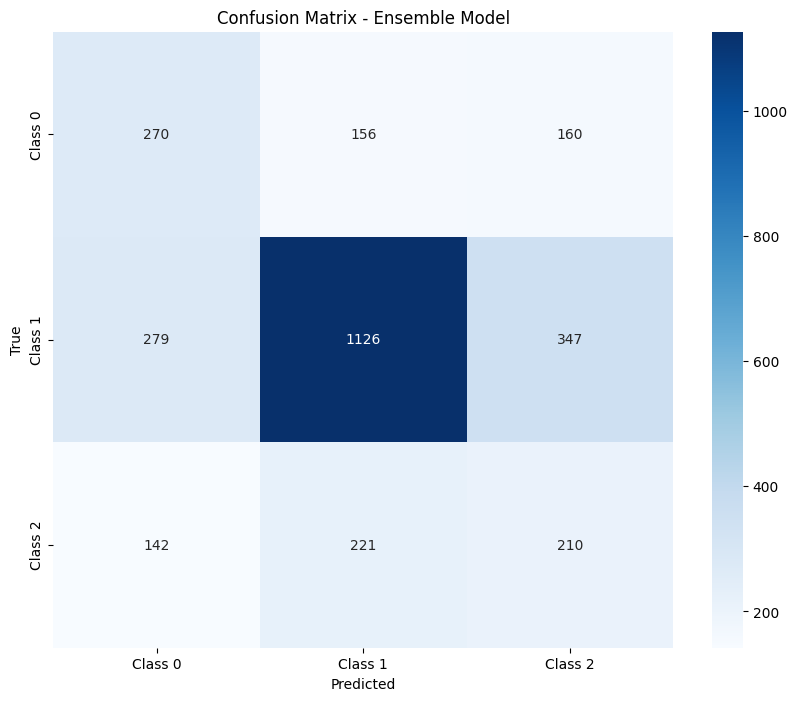

In [202]:
# Predict
y_pred_ensemble = classifier.trained_models["Ensemble"].predict(X_test)

# Confusion Matrix
from sklearn.metrics import confusion_matrix
ensemble_cm = confusion_matrix(y_test, y_pred_ensemble)

# Plot manually
plt.figure(figsize=(10, 8))
sns.heatmap(ensemble_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Class 0", "Class 1", "Class 2"],
            yticklabels=["Class 0", "Class 1", "Class 2"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Ensemble Model')
plt.show()


From this confusion matrix we can see our model is still misclassifying the minority classes heavily but performing somewhat well on the majority class.


### Next steps from Machine learning.



1.   Machine learning models performed very poorly especially on the minority classes even after dealing with imbalance meaning we might need more data to train the models on for them to capture underlying patterns well.

2.   We can try the deep learning approach to see if deep learning models might outperfrom the machine learning models and improve on their classification ability.